<a href="https://colab.research.google.com/github/Montasir00/Ml_final_project/blob/tabby/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**

Team members:
1. Pham Gia Khiem - 551026 (Vietnam)
2. Mohammed Hassan – 541140 (Bangladesh)
3. Fazlur Rahman - 541927 (Bangladesh)

# I. UNDERSTANDING THE DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
import shap

In [ ]:
df = pd.read_csv('/content/final_project_dataset_complete.csv')
df

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1     -0.138264  -0.061846        NaN   0.403768   0.704674  -2.498565   
2      0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3      1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4     -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   
...         ...        ...        ...        ...        ...        ...   
8995   0.101630   0.400250        NaN  -0.019412  -0.063150   0.077627   
8996   1.167218   2.177774  -1.716067   1.994835   0.350043  -0.544915   
8997   1.588447   3.333945  -2.615488   3.476880  -0.933276   2.027658   
8998  -0.684987  -1.599835   1.063341  -1.252109  -0.724001   2.228943   
8999   0.801182   1.808647  -1.383917   1.841776   0.702840  -0.339918   

      feature_7  feature_8     category_1 category_2  target  
0     -1.300105  -2.242241  Above Average   Region C       1  
1     -1.339227  -1.942298  Below Average   Region A       0  
2      1.190238   1.503559           High   Region C       1  
3      2.120913   3.409035           High   Region B       1  
4      0.935759  -0.401463  Below Average   Region C       0  
...         ...        ...            ...        ...     ...  
8995   0.540975  -0.169030  Above Average   Region A       0  
8996   0.089050  -0.944220           High   Region C       1  
8997   0.239583   1.951491           High   Region C       1  
8998   0.989794   1.936476            Low   Region B       0  
8999  -0.027882  -0.462744           High   Region C       1  

[9000 rows x 11 columns]

In [ ]:
df.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1  -0.138264  -0.061846        NaN   0.403768   0.704674  -2.498565   
2   0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3   1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4  -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   

   feature_7  feature_8     category_1 category_2  target  
0  -1.300105  -2.242241  Above Average   Region C       1  
1  -1.339227  -1.942298  Below Average   Region A       0  
2   1.190238   1.503559           High   Region C       1  
3   2.120913   3.409035           High   Region B       1  
4   0.935759  -0.401463  Below Average   Region C       0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB


In [ ]:
df.describe()

feature_1    feature_2    feature_3    feature_4    feature_5  \
count  9000.000000  9000.000000  8600.000000  9000.000000  9000.000000   
mean      0.000427     0.003349     0.003235    -0.008481    -0.002177   
std       1.241318     2.508324     1.542901     2.061784     0.577415   
min     -18.665400   -37.852816    -6.676680    -8.190124    -0.999791   
25%      -0.680062    -1.382610    -1.022085    -1.399928    -0.502614   
50%      -0.003938    -0.016698     0.005196    -0.019541     0.001695   
75%       0.680513     1.380228     1.038571     1.394151     0.497004   
max      21.934496    47.603454     6.203055     8.189001     0.999914   

         feature_6    feature_7    feature_8       target  
count  8500.000000  9000.000000  9000.000000  9000.000000  
mean     -0.006447     0.000592     0.003348     0.475444  
std       1.981615     1.075064     2.043643     0.499424  
min      -8.590782    -4.422265    -9.474989     0.000000  
25%      -1.329040    -0.700078    -1.356620     0.000000  
50%      -0.003137    -0.000097    -0.007584     0.000000  
75%       1.324897     0.731942     1.402024     1.000000  
max       6.803751     3.857219     7.572578     1.000000

In [ ]:
numerical_features = df.select_dtypes(include=['float64','int64'])

In [ ]:
numerical_features

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1     -0.138264  -0.061846        NaN   0.403768   0.704674  -2.498565   
2      0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3      1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4     -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   
...         ...        ...        ...        ...        ...        ...   
8995   0.101630   0.400250        NaN  -0.019412  -0.063150   0.077627   
8996   1.167218   2.177774  -1.716067   1.994835   0.350043  -0.544915   
8997   1.588447   3.333945  -2.615488   3.476880  -0.933276   2.027658   
8998  -0.684987  -1.599835   1.063341  -1.252109  -0.724001   2.228943   
8999   0.801182   1.808647  -1.383917   1.841776   0.702840  -0.339918   

      feature_7  feature_8  target  
0     -1.300105  -2.242241       1  
1     -1.339227  -1.942298       0  
2      1.190238   1.503559       1  
3      2.120913   3.409035       1  
4      0.935759  -0.401463       0  
...         ...        ...     ...  
8995   0.540975  -0.169030       0  
8996   0.089050  -0.944220       1  
8997   0.239583   1.951491       1  
8998   0.989794   1.936476       0  
8999  -0.027882  -0.462744       1  

[9000 rows x 9 columns]

In [ ]:
numerical_features.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1  -0.138264  -0.061846        NaN   0.403768   0.704674  -2.498565   
2   0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3   1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4  -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   

   feature_7  feature_8  target  
0  -1.300105  -2.242241       1  
1  -1.339227  -1.942298       0  
2   1.190238   1.503559       1  
3   2.120913   3.409035       1  
4   0.935759  -0.401463       0

In [ ]:
categorical_features = df.select_dtypes(include=['object'])

In [ ]:
categorical_features.head()

category_1 category_2
0  Above Average   Region C
1  Below Average   Region A
2           High   Region C
3           High   Region B
4  Below Average   Region C

In [ ]:
numerical_corr = numerical_features.corr()

In [ ]:
#Correlation Matrix
numerical_corr

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
feature_1   1.000000   0.995360  -0.831705   0.831922  -0.015305  -0.010813   
feature_2   0.995360   1.000000  -0.823242   0.832002  -0.014715  -0.011519   
feature_3  -0.831705  -0.823242   1.000000  -0.957222   0.011309   0.003989   
feature_4   0.831922   0.832002  -0.957222   1.000000  -0.003613  -0.000213   
feature_5  -0.015305  -0.014715   0.011309  -0.003613   1.000000  -0.009365   
feature_6  -0.010813  -0.011519   0.003989  -0.000213  -0.009365   1.000000   
feature_7  -0.010843  -0.011393   0.006042  -0.001369   0.252371   0.921569   
feature_8  -0.004581  -0.005394   0.001846   0.001202  -0.012717   0.969998   
target      0.605940   0.606016  -0.704351   0.694885  -0.007873   0.001457   

           feature_7  feature_8    target  
feature_1  -0.010843  -0.004581  0.605940  
feature_2  -0.011393  -0.005394  0.606016  
feature_3   0.006042   0.001846 -0.704351  
feature_4  -0.001369   0.001202  0.694885  
feature_5   0.252371  -0.012717 -0.007873  
feature_6   0.921569   0.969998  0.001457  
feature_7   1.000000   0.894220 -0.002000  
feature_8   0.894220   1.000000  0.004658  
target     -0.002000   0.004658  1.000000

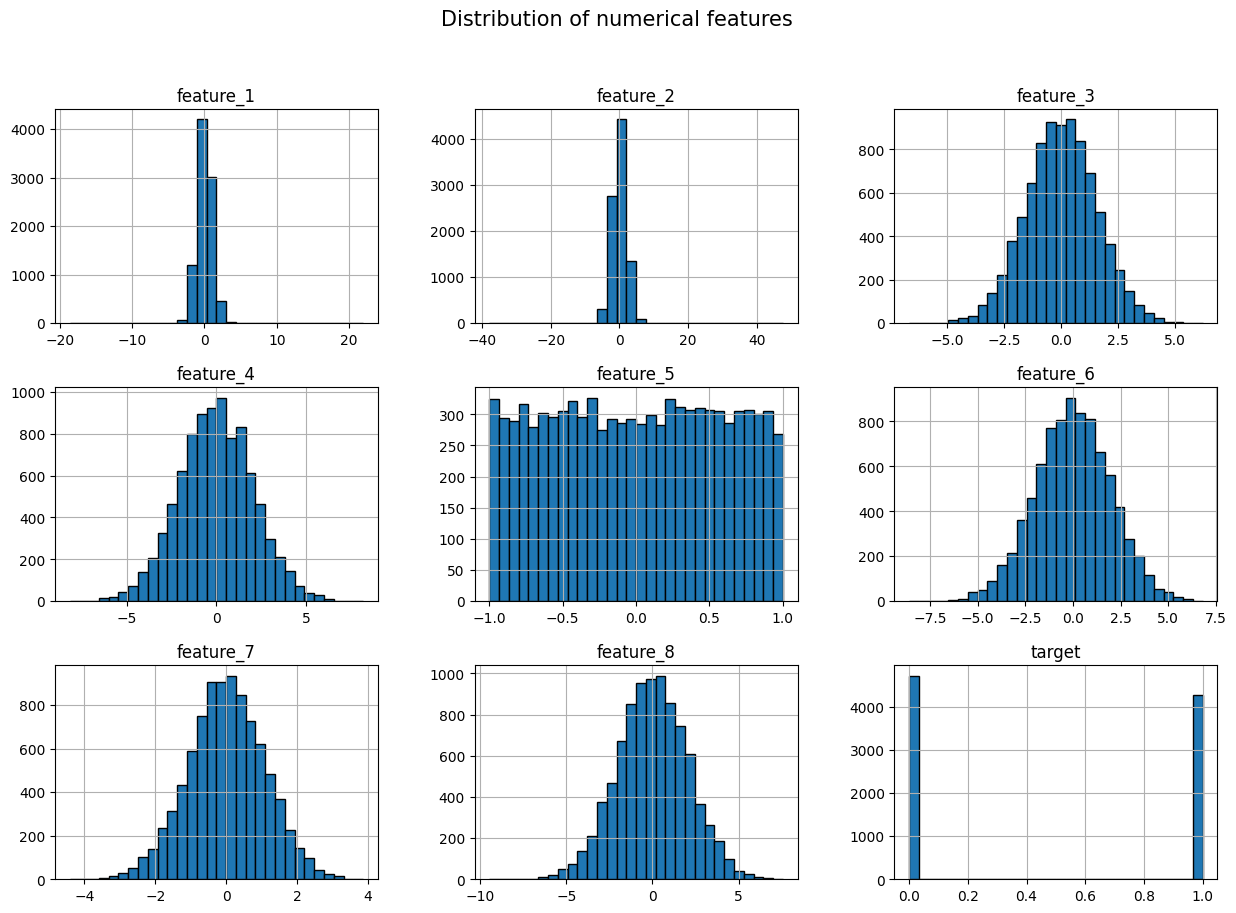

In [ ]:
#Historgram of distribution of numerical features
df.hist(bins=30, figsize=(15,10), edgecolor = 'black')
plt.suptitle("Distribution of numerical features", fontsize = 15)
plt.show()

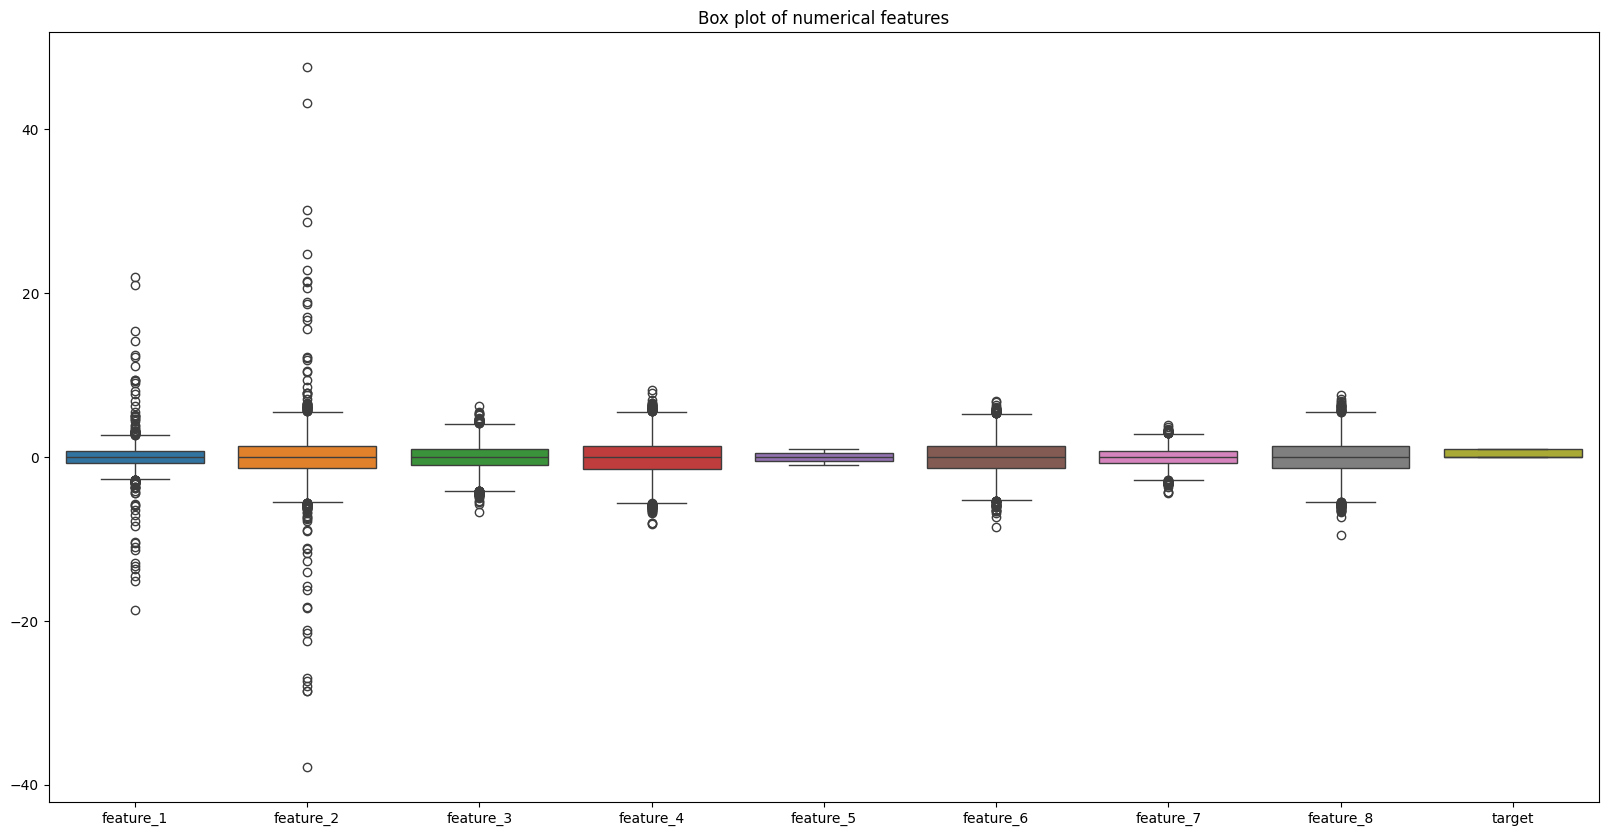

In [ ]:
#Box plot of distribution of numerical features
plt.figure(figsize=(20,10))
sns.boxplot(data=numerical_features)
plt.title('Box plot of numerical features')
plt.show()

# II. DATA PREPROCESSING


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

feature_1       0
feature_2       0
feature_3     400
feature_4       0
feature_5       0
feature_6     500
feature_7       0
feature_8       0
category_1      0
category_2      0
target          0
dtype: int64

In [ ]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

feature_3    400
feature_6    500
dtype: int64


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['feature_3'] = imputer.fit_transform(df[['feature_3']])
df['feature_6'] = imputer.fit_transform(df[['feature_6']])

In [ ]:
df['feature_3'].isna().sum()
df['feature_6'].isna().sum()

np.int64(0)

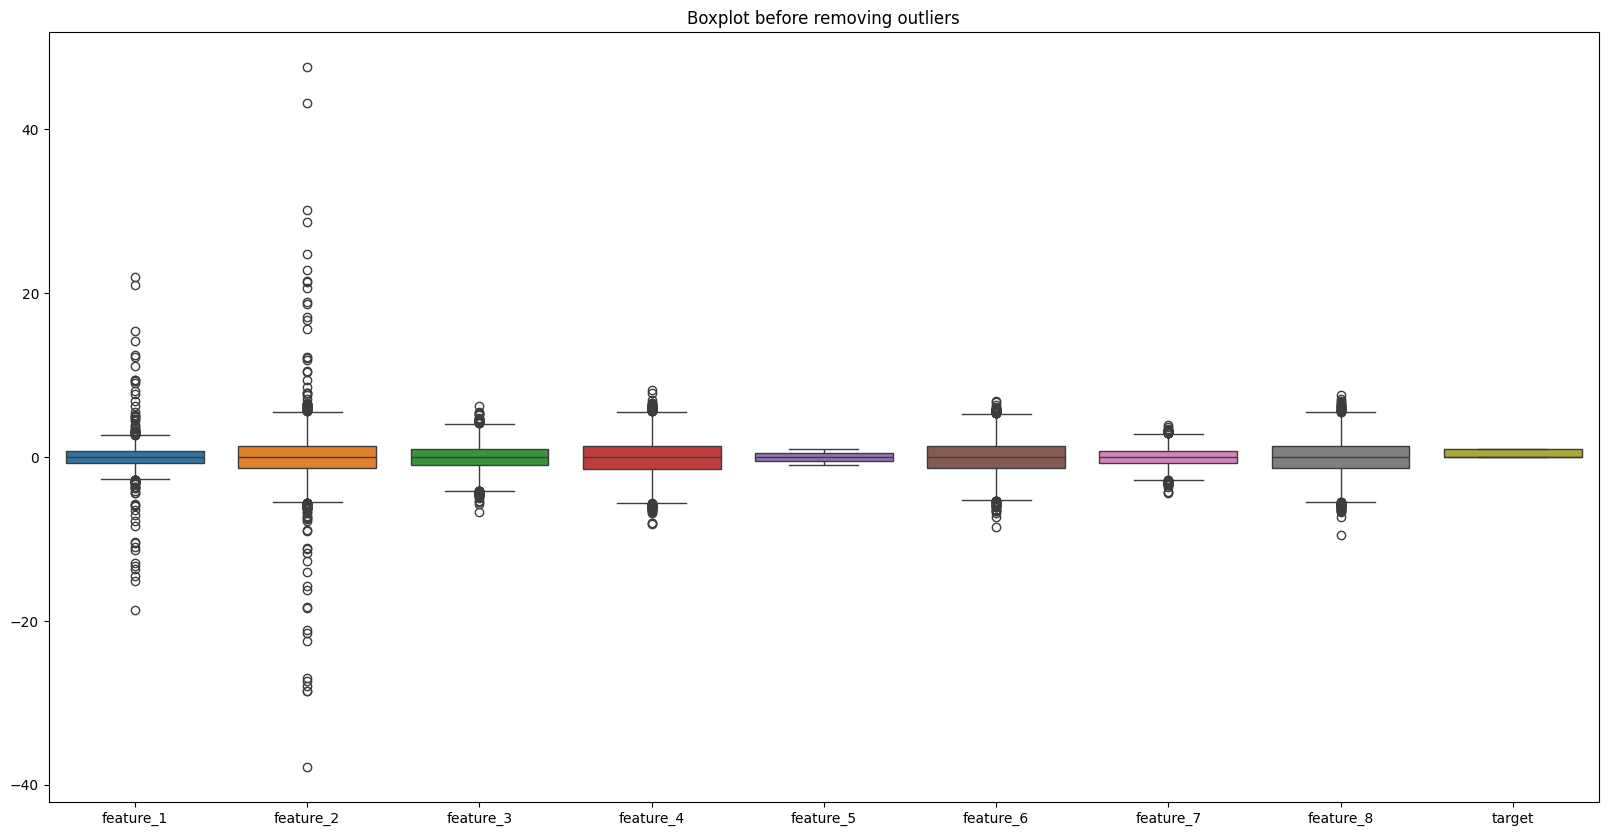

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=numerical_features)
plt.title('Boxplot before removing outliers')
plt.show()

In [ ]:
def iqr_outliers(dataset, feature_name, multiplier= 1.5):
    Q1 = dataset[feature_name].quantile(0.25)
    Q3 = dataset[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - multiplier * IQR
    upper_limit = Q3 + multiplier * IQR

    outliers = dataset[(dataset[feature_name] < lower_limit) | (dataset[feature_name] > upper_limit)]

    return outliers, {'lower_limit': lower_limit, 'upper_limit': upper_limit}

outliers_detected = {}

for feature in numerical_features.columns:
    outliers, limits = iqr_outliers(numerical_features, feature)
    outliers_detected[feature] = {
        'count': len(outliers),
        'indices': outliers.index.tolist(),
        'limits': limits
    }

    print(f'Feature: {feature}')
    print(f'Number of outliers: {len(outliers)}')
    print(f'Lower limit: {limits["lower_limit"]}, Upper limit: {limits["upper_limit"]}')
    print(f'Outlier indices: {outliers.index.tolist()}')
    print('-' * 50)

Feature: feature_1
Number of outliers: 113
Lower limit: -2.7209235765, Upper limit: 2.7213741995
Outlier indices: [209, 262, 277, 469, 478, 496, 598, 774, 1061, 1101, 1400, 1445, 1539, 1591, 1615, 1785, 1957, 1971, 2024, 2035, 2093, 2218, 2228, 2305, 2336, 2442, 2458, 2506, 2521, 2884, 2895, 2947, 3017, 3152, 3227, 3241, 3245, 3336, 3454, 3510, 3569, 3716, 3872, 3982, 3986, 4026, 4029, 4033, 4047, 4091, 4198, 4207, 4265, 4359, 4531, 4617, 4635, 4639, 4725, 4779, 4784, 4870, 4997, 5157, 5224, 5316, 5416, 5488, 5587, 5642, 5649, 5673, 5773, 5796, 5846, 5907, 5935, 5998, 6350, 6408, 6628, 6693, 6738, 6747, 6891, 7060, 7140, 7178, 7223, 7290, 7305, 7330, 7441, 7498, 7611, 7624, 7677, 7839, 7851, 7858, 7872, 7874, 8024, 8067, 8165, 8180, 8200, 8248, 8283, 8354, 8630, 8714, 8726]
--------------------------------------------------
Feature: feature_2
Number of outliers: 106
Lower limit: -5.5268680488749995, Upper limit: 5.524485932125
Outlier indices: [209, 262, 277, 469, 478, 496, 598, 774, 1

In [ ]:
df_1 = df.copy()
for feature, values in outliers_detected.items():
    outlier_indices = values['indices']
    median_value = df_1[feature].median()
    df_1.loc[outlier_indices, feature] = median_value
    print(f"Feature: {feature}")
    print(f"Replaced outliers in indices: {outlier_indices}")
    print('-' * 50)

Feature: feature_1
Replaced outliers in indices: [209, 262, 277, 469, 478, 496, 598, 774, 1061, 1101, 1400, 1445, 1539, 1591, 1615, 1785, 1957, 1971, 2024, 2035, 2093, 2218, 2228, 2305, 2336, 2442, 2458, 2506, 2521, 2884, 2895, 2947, 3017, 3152, 3227, 3241, 3245, 3336, 3454, 3510, 3569, 3716, 3872, 3982, 3986, 4026, 4029, 4033, 4047, 4091, 4198, 4207, 4265, 4359, 4531, 4617, 4635, 4639, 4725, 4779, 4784, 4870, 4997, 5157, 5224, 5316, 5416, 5488, 5587, 5642, 5649, 5673, 5773, 5796, 5846, 5907, 5935, 5998, 6350, 6408, 6628, 6693, 6738, 6747, 6891, 7060, 7140, 7178, 7223, 7290, 7305, 7330, 7441, 7498, 7611, 7624, 7677, 7839, 7851, 7858, 7872, 7874, 8024, 8067, 8165, 8180, 8200, 8248, 8283, 8354, 8630, 8714, 8726]
--------------------------------------------------
Feature: feature_2
Replaced outliers in indices: [209, 262, 277, 469, 478, 496, 598, 774, 1061, 1101, 1400, 1445, 1591, 1615, 1785, 1957, 1971, 2024, 2093, 2218, 2228, 2305, 2336, 2442, 2458, 2506, 2895, 2947, 3017, 3152, 3227, 3

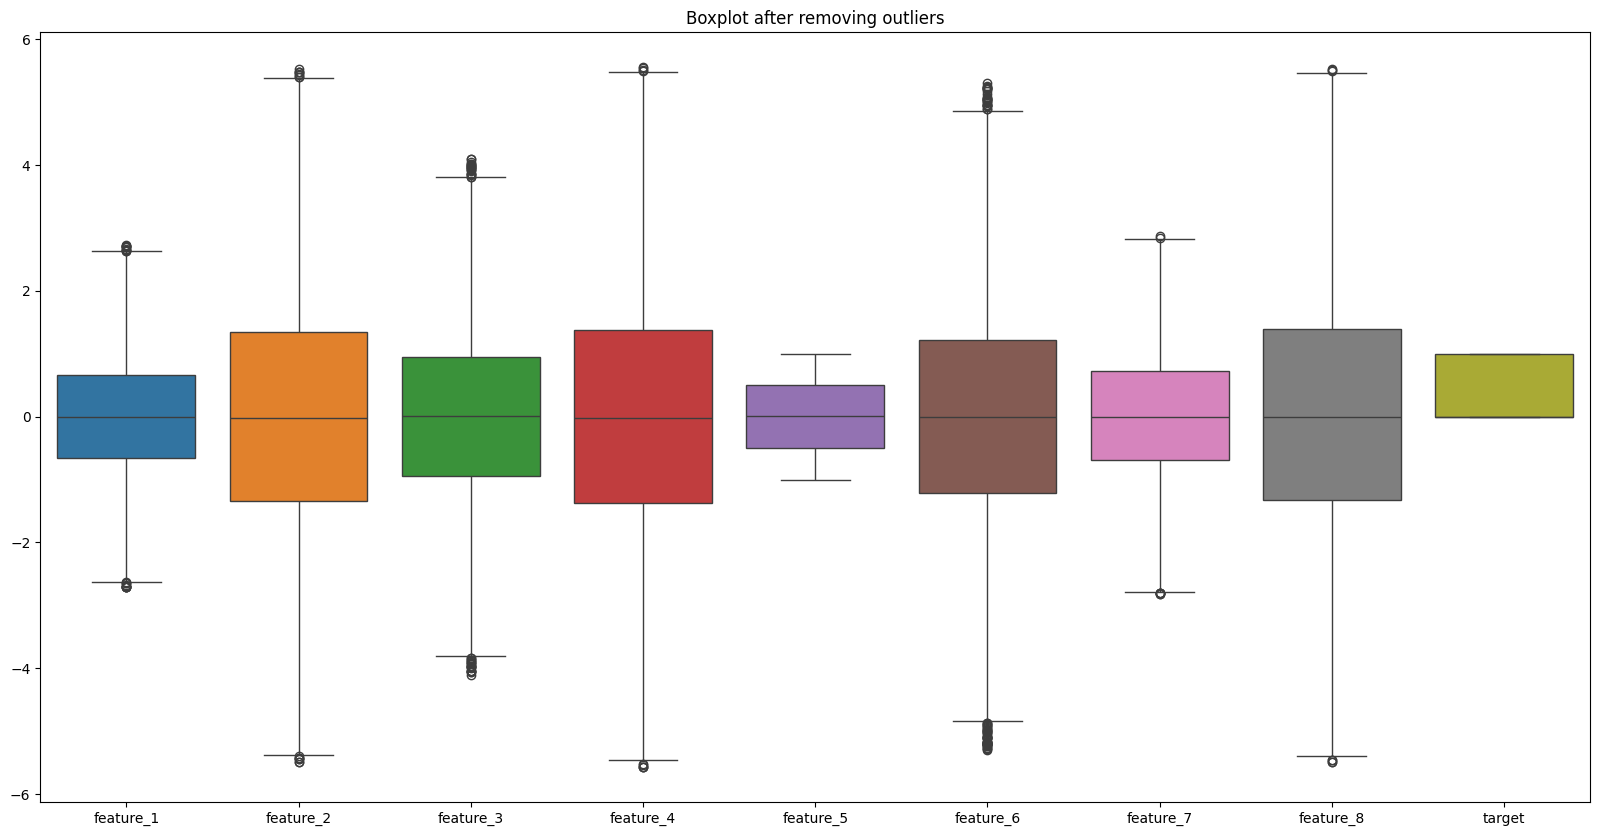

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Boxplot after removing outliers')
sns.boxplot(data=df_1)
plt.show()

In [ ]:
df_1.describe()

feature_1    feature_2    feature_3    feature_4    feature_5  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean     -0.000672     0.002354     0.005962    -0.010226    -0.002177   
std       0.971927     1.959564     1.448882     1.986669     0.577415   
min      -2.712613    -5.486925    -4.104379    -5.569645    -0.999791   
25%      -0.657194    -1.346706    -0.950363    -1.377240    -0.502614   
50%      -0.003938    -0.016698     0.005196    -0.019541     0.001695   
75%       0.659561     1.343450     0.954145     1.368650     0.497004   
max       2.720169     5.516173     4.096764     5.552331     0.999914   

         feature_6    feature_7    feature_8       target  
count  9000.000000  9000.000000  9000.000000  9000.000000  
mean     -0.004937     0.006010     0.010578     0.475444  
std       1.865959     1.038181     1.980097     0.499424  
min      -5.299373    -2.819977    -5.490152     0.000000  
25%      -1.211517    -0.684357    -1.329677     0.000000  
50%      -0.003137    -0.000097    -0.007584     0.000000  
75%       1.218900     0.720851     1.386503     1.000000  
max       5.293819     2.876070     5.529430     1.000000

In [ ]:
categorical_features.head()

category_1 category_2
0  Above Average   Region C
1  Below Average   Region A
2           High   Region C
3           High   Region B
4  Below Average   Region C

In [ ]:
df_2 = df_1.copy()
#for category_1
ordinal_mapping ={
    'Low': 0,
    'Below Average': 1,
    'Above Average': 2,
    'High': 3
}
df_2['category_1_encoded'] = df_2['category_1'].map(ordinal_mapping)

#for category_2
df_one_hot = pd.get_dummies(df_2['category_2'])
df_one_hot = df_one_hot.astype(int)
df_2 = pd.concat([df_2, df_one_hot], axis=1)

df_2.drop(columns=['category_1','category_2'], inplace =True)
df_2.head()


feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1  -0.138264  -0.061846   0.005196   0.403768   0.704674  -2.498565   
2   0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3   1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4  -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   

   feature_7  feature_8  target  category_1_encoded  Region A  Region B  \
0  -1.300105  -2.242241       1                   2         0         0   
1  -1.339227  -1.942298       0                   1         1         0   
2   1.190238   1.503559       1                   3         0         0   
3   2.120913   3.409035       1                   3         0         1   
4   0.935759  -0.401463       0                   1         0         0   

   Region C  
0         1  
1         0  
2         1  
3         0  
4         1

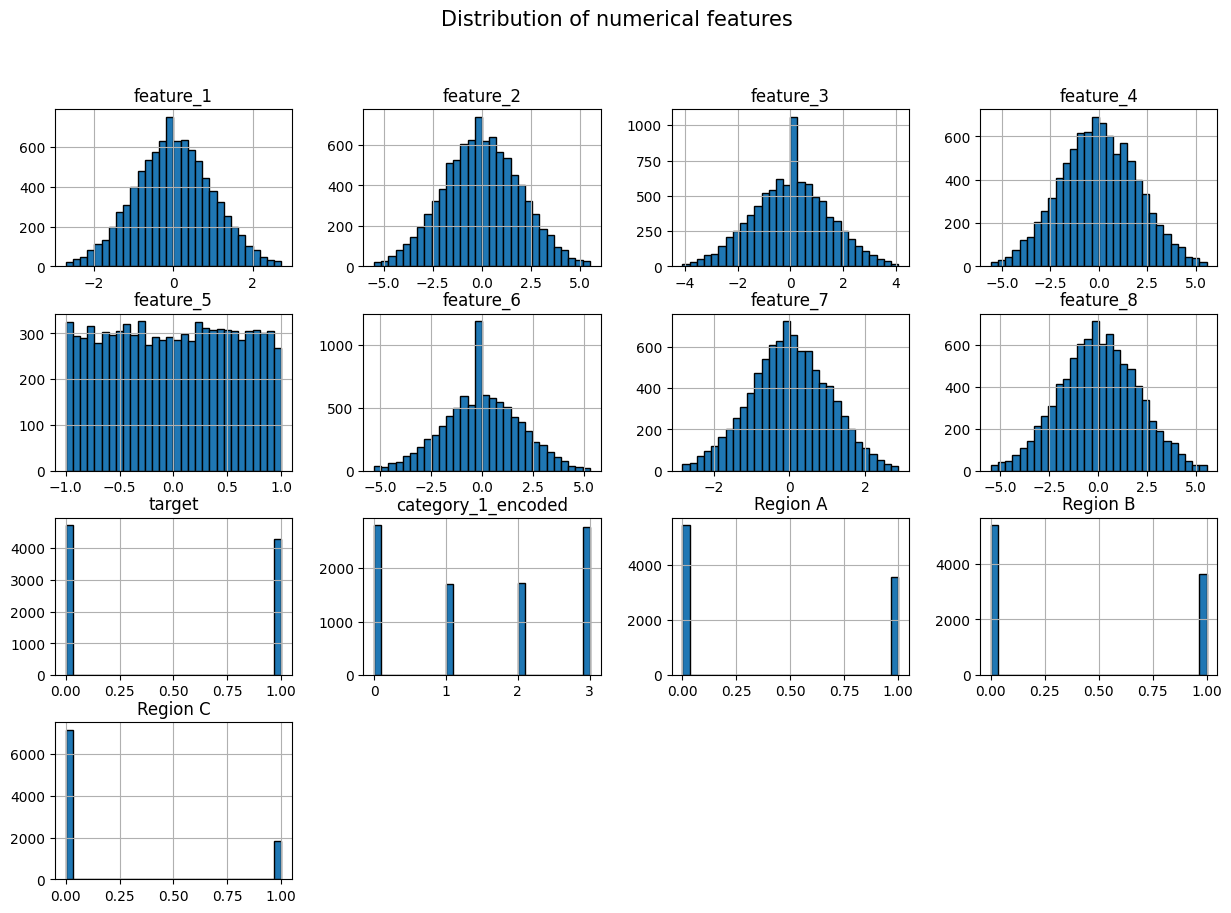

In [ ]:
df_2.hist(bins = 30, figsize=(15,10), edgecolor = 'black')
plt.suptitle("Distribution of numerical features", fontsize = 15)
plt.show()

In [ ]:
df_2.describe()

feature_1    feature_2    feature_3    feature_4    feature_5  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean     -0.000672     0.002354     0.005962    -0.010226    -0.002177   
std       0.971927     1.959564     1.448882     1.986669     0.577415   
min      -2.712613    -5.486925    -4.104379    -5.569645    -0.999791   
25%      -0.657194    -1.346706    -0.950363    -1.377240    -0.502614   
50%      -0.003938    -0.016698     0.005196    -0.019541     0.001695   
75%       0.659561     1.343450     0.954145     1.368650     0.497004   
max       2.720169     5.516173     4.096764     5.552331     0.999914   

         feature_6    feature_7    feature_8       target  category_1_encoded  \
count  9000.000000  9000.000000  9000.000000  9000.000000         9000.000000   
mean     -0.004937     0.006010     0.010578     0.475444            1.494556   
std       1.865959     1.038181     1.980097     0.499424            1.219345   
min      -5.299373    -2.819977    -5.490152     0.000000            0.000000   
25%      -1.211517    -0.684357    -1.329677     0.000000            0.000000   
50%      -0.003137    -0.000097    -0.007584     0.000000            1.000000   
75%       1.218900     0.720851     1.386503     1.000000            3.000000   
max       5.293819     2.876070     5.529430     1.000000            3.000000   

          Region A     Region B     Region C  
count  9000.000000  9000.000000  9000.000000  
mean      0.394556     0.402000     0.203444  
std       0.488782     0.490329     0.402583  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       1.000000     1.000000     0.000000  
max       1.000000     1.000000     1.000000

In [ ]:
# export cleaned dataset
df_2.to_csv('C:\depression analysis\Machine Learning\final project\cleaned_dataset.csv')

# III. EDA (EXPLORATORY DATA ANALYSIS)




In [ ]:
df_2.describe()

feature_1    feature_2    feature_3    feature_4    feature_5  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean     -0.000672     0.002354     0.005962    -0.010226    -0.002177   
std       0.971927     1.959564     1.448882     1.986669     0.577415   
min      -2.712613    -5.486925    -4.104379    -5.569645    -0.999791   
25%      -0.657194    -1.346706    -0.950363    -1.377240    -0.502614   
50%      -0.003938    -0.016698     0.005196    -0.019541     0.001695   
75%       0.659561     1.343450     0.954145     1.368650     0.497004   
max       2.720169     5.516173     4.096764     5.552331     0.999914   

         feature_6    feature_7    feature_8       target  category_1_encoded  \
count  9000.000000  9000.000000  9000.000000  9000.000000         9000.000000   
mean     -0.004937     0.006010     0.010578     0.475444            1.494556   
std       1.865959     1.038181     1.980097     0.499424            1.219345   
min      -5.299373    -2.819977    -5.490152     0.000000            0.000000   
25%      -1.211517    -0.684357    -1.329677     0.000000            0.000000   
50%      -0.003137    -0.000097    -0.007584     0.000000            1.000000   
75%       1.218900     0.720851     1.386503     1.000000            3.000000   
max       5.293819     2.876070     5.529430     1.000000            3.000000   

          Region A     Region B     Region C  
count  9000.000000  9000.000000  9000.000000  
mean      0.394556     0.402000     0.203444  
std       0.488782     0.490329     0.402583  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       1.000000     1.000000     0.000000  
max       1.000000     1.000000     1.000000

In [ ]:
df_2.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1  -0.138264  -0.061846   0.005196   0.403768   0.704674  -2.498565   
2   0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3   1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4  -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   

   feature_7  feature_8  target  category_1_encoded  Region A  Region B  \
0  -1.300105  -2.242241       1                   2         0         0   
1  -1.339227  -1.942298       0                   1         1         0   
2   1.190238   1.503559       1                   3         0         0   
3   2.120913   3.409035       1                   3         0         1   
4   0.935759  -0.401463       0                   1         0         0   

   Region C  
0         1  
1         0  
2         1  
3         0  
4         1

In [ ]:
numerical_feas = df_2.select_dtypes(include=['float64','int64'])
numerical_feas.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1  -0.138264  -0.061846   0.005196   0.403768   0.704674  -2.498565   
2   0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3   1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4  -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   

   feature_7  feature_8  target  category_1_encoded  Region A  Region B  \
0  -1.300105  -2.242241       1                   2         0         0   
1  -1.339227  -1.942298       0                   1         1         0   
2   1.190238   1.503559       1                   3         0         0   
3   2.120913   3.409035       1                   3         0         1   
4   0.935759  -0.401463       0                   1         0         0   

   Region C  
0         1  
1         0  
2         1  
3         0  
4         1

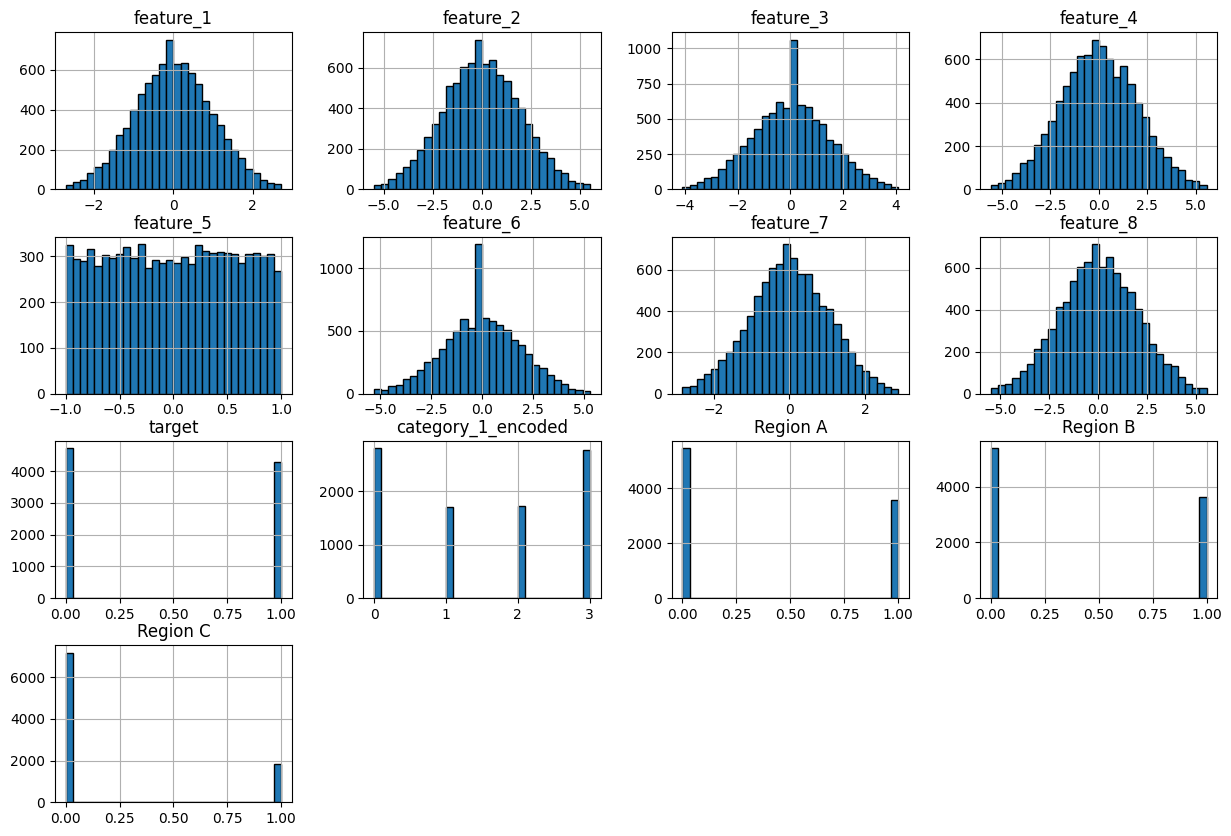

In [ ]:
df_2.hist(bins = 30, figsize=(15,10), edgecolor = 'black')
plt.show()

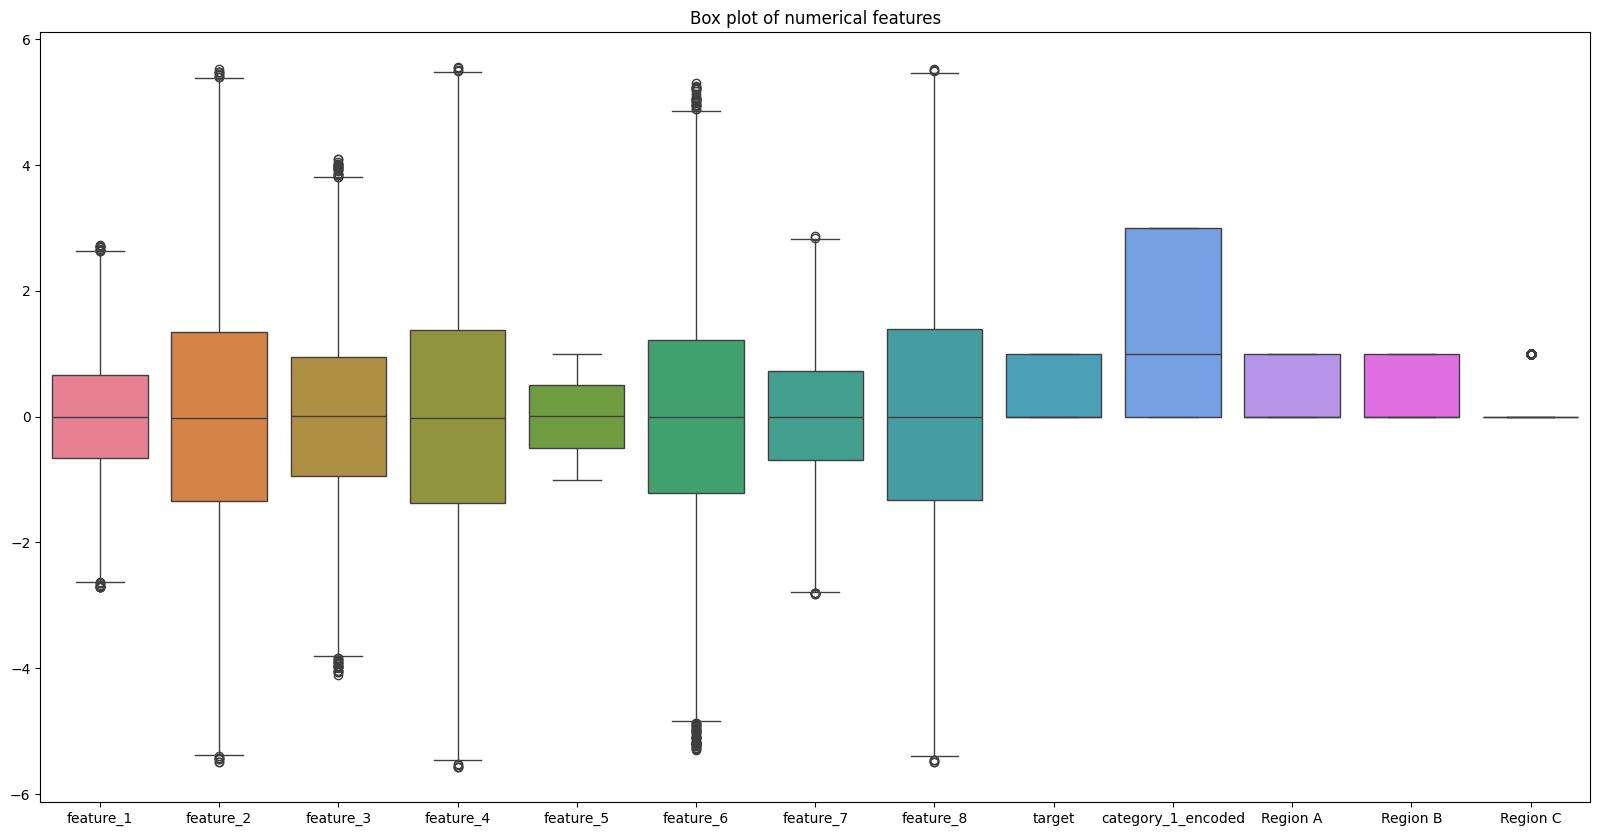

In [ ]:
#Box plot of distribution of numerical features
plt.figure(figsize=(20,10))
sns.boxplot(data=numerical_feas)
plt.title('Box plot of numerical features')
plt.show()

In [ ]:
corr_matrix = df_2.corr()
corr_matrix

feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_1            1.000000   0.988146  -0.940411   0.953685  -0.007619   
feature_2            0.988146   1.000000  -0.931900   0.961785  -0.006134   
feature_3           -0.940411  -0.931900   1.000000  -0.917972   0.011946   
feature_4            0.953685   0.961785  -0.917972   1.000000  -0.003541   
feature_5           -0.007619  -0.006134   0.011946  -0.003541   1.000000   
feature_6            0.000234   0.001543  -0.002115   0.005649  -0.005303   
feature_7           -0.005004  -0.003342   0.005491  -0.000322   0.243074   
feature_8            0.000782   0.001857  -0.003852   0.004529  -0.015758   
target               0.704378   0.707938  -0.691259   0.698014  -0.007873   
category_1_encoded   0.903550   0.900089  -0.870591   0.885339  -0.009770   
Region A             0.007945   0.006452  -0.009001   0.006577  -0.011237   
Region B             0.004429   0.007418  -0.007496   0.008024  -0.005956   
Region C            -0.015040  -0.016868   0.020058  -0.017758   0.020897   

                    feature_6  feature_7  feature_8    target  \
feature_1            0.000234  -0.005004   0.000782  0.704378   
feature_2            0.001543  -0.003342   0.001857  0.707938   
feature_3           -0.002115   0.005491  -0.003852 -0.691259   
feature_4            0.005649  -0.000322   0.004529  0.698014   
feature_5           -0.005303   0.243074  -0.015758 -0.007873   
feature_6            1.000000   0.872284   0.918771  0.005262   
feature_7            0.872284   1.000000   0.866412 -0.002218   
feature_8            0.918771   0.866412   1.000000  0.004361   
target               0.005262  -0.002218   0.004361  1.000000   
category_1_encoded   0.006317  -0.001459   0.005972  0.755237   
Region A            -0.000701  -0.002490  -0.001503 -0.000593   
Region B            -0.003828  -0.007720  -0.002065  0.009458   
Region C             0.005514   0.012425   0.004340 -0.010799   

                    category_1_encoded  Region A  Region B  Region C  
feature_1                     0.903550  0.007945  0.004429 -0.015040  
feature_2                     0.900089  0.006452  0.007418 -0.016868  
feature_3                    -0.870591 -0.009001 -0.007496  0.020058  
feature_4                     0.885339  0.006577  0.008024 -0.017758  
feature_5                    -0.009770 -0.011237 -0.005956  0.020897  
feature_6                     0.006317 -0.000701 -0.003828  0.005514  
feature_7                    -0.001459 -0.002490 -0.007720  0.012425  
feature_8                     0.005972 -0.001503 -0.002065  0.004340  
target                        0.755237 -0.000593  0.009458 -0.010799  
category_1_encoded            1.000000  0.008732  0.000873 -0.011665  
Region A                      0.008732  1.000000 -0.661880 -0.407973  
Region B                      0.000873 -0.661880  1.000000 -0.414360  
Region C                     -0.011665 -0.407973 -0.414360  1.000000

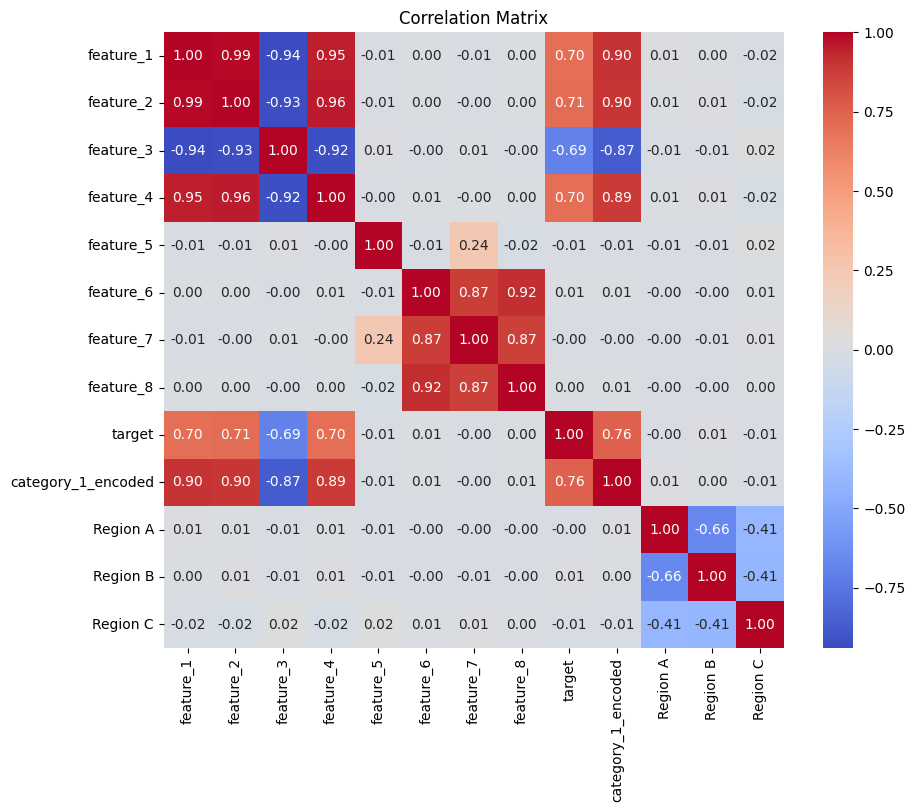

In [ ]:
# plot heatmap that visualizes the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# perform t-tests
from scipy import stats
results = {}
for feature in numerical_feas[:-1]:
    group1 = df_2[df_2['target'] == 1][feature].dropna()
    group0 = df_2[df_2['target'] == 0][feature].dropna()
    t_stat, p_value = stats.ttest_ind(group1, group0)
    results[feature] = {'t_statistic': t_stat, 'p_value': p_value}
results_df_2 = pd.DataFrame(results).T
results_df_2.index.name = 'Feature'
print(results_df_2)

                    t_statistic   p_value
Feature                                  
feature_1             94.129918  0.000000
feature_2             95.081086  0.000000
feature_3            -90.742558  0.000000
feature_4             92.464130  0.000000
feature_5             -0.746804  0.455201
feature_6              0.499102  0.617720
feature_7             -0.210384  0.833373
feature_8              0.413642  0.679146
target                      inf  0.000000
category_1_encoded   109.298957  0.000000
Region A              -0.056275  0.955124
Region B               0.897181  0.369646
Region C              -1.024417  0.305666


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from scipy import stats
import pandas as pd

chi_square_results = {}

# Chi-square test for the encoded category_1
contingency_table_1_encoded = pd.crosstab(df_2['category_1_encoded'], df_2['target'])
chi2_stat_1_encoded, p_value_1_encoded, dof_1_encoded, expected_1_encoded = stats.chi2_contingency(contingency_table_1_encoded)
chi_square_results['category_1_encoded'] = {'chi2_statistic': chi2_stat_1_encoded, 'p_value': p_value_1_encoded}

# Chi-square test for the regions (each against the target)
contingency_table_region_a = pd.crosstab(df_2['Region A'], df_2['target'])
chi2_stat_region_a, p_value_region_a, dof_region_a, expected_region_a = stats.chi2_contingency(contingency_table_region_a)
chi_square_results['region_a'] = {'chi2_statistic': chi2_stat_region_a, 'p_value': p_value_region_a}

contingency_table_region_b = pd.crosstab(df_2['Region B'], df_2['target'])
chi2_stat_region_b, p_value_region_b, dof_region_b, expected_region_b = stats.chi2_contingency(contingency_table_region_b)
chi_square_results['region_b'] = {'chi2_statistic': chi2_stat_region_b, 'p_value': p_value_region_b}

contingency_table_region_c = pd.crosstab(df_2['Region C'], df_2['target'])
chi2_stat_region_c, p_value_region_c, dof_region_c, expected_region_c = stats.chi2_contingency(contingency_table_region_c)
chi_square_results['region_c'] = {'chi2_statistic': chi2_stat_region_c, 'p_value': p_value_region_c}

chi_square_results_df = pd.DataFrame.from_dict(chi_square_results, orient='index')
chi_square_results_df.index.name = 'Feature'

print(chi_square_results_df)

                    chi2_statistic   p_value
Feature                                     
category_1_encoded     5175.320287  0.000000
region_a                  0.001203  0.972329
region_b                  0.766878  0.381185
region_c                  0.996512  0.318156


# IV. FEATURE ENGINEERING

In [ ]:
df_3 = df_2.copy()
print("Column names in df_3:")
print(df_3.columns.tolist())

Column names in df_3:
['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'target', 'category_1_encoded', 'Region A', 'Region B', 'Region C']


In [ ]:
df_3 = df_2.copy()
# feature engineering
def feature_engineering(df_3):
    df_3['feature_9'] = df_3['feature_2'] * df_3['category_1_encoded']
    df_3 = df_3.drop(['feature_1', 'feature_3', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'Region A', 'Region B', 'Region C'], axis=1)
    return df_3

df_3 = feature_engineering(df_3)
df_3.head()

feature_2  feature_4  target  category_1_encoded  feature_9
0   1.146509   0.833005       1                   2   2.293017
1  -0.061846   0.403768       0                   1  -0.061846
2   1.395115   1.708266       1                   3   4.185345
3   2.657560   2.649051       1                   3   7.972681
4  -0.499391  -0.441656       0                   1  -0.499391

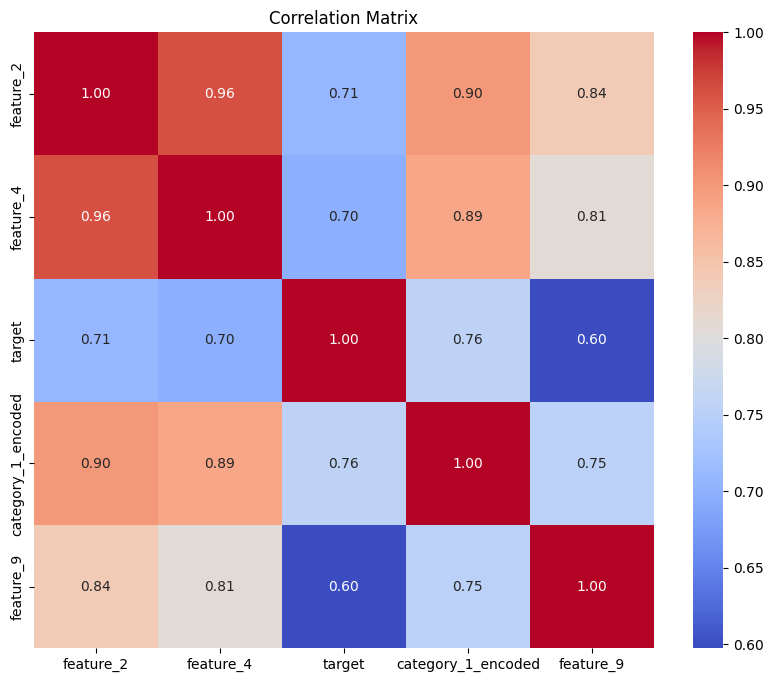

In [ ]:
# plot heatmap that visualize the correlation matrix
correlation_matrix = df_3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# export cleaned dataset with new features
df_3.to_csv('C:\depression analysis\Machine Learning\final project\cleaned_dataset with new features.csv')

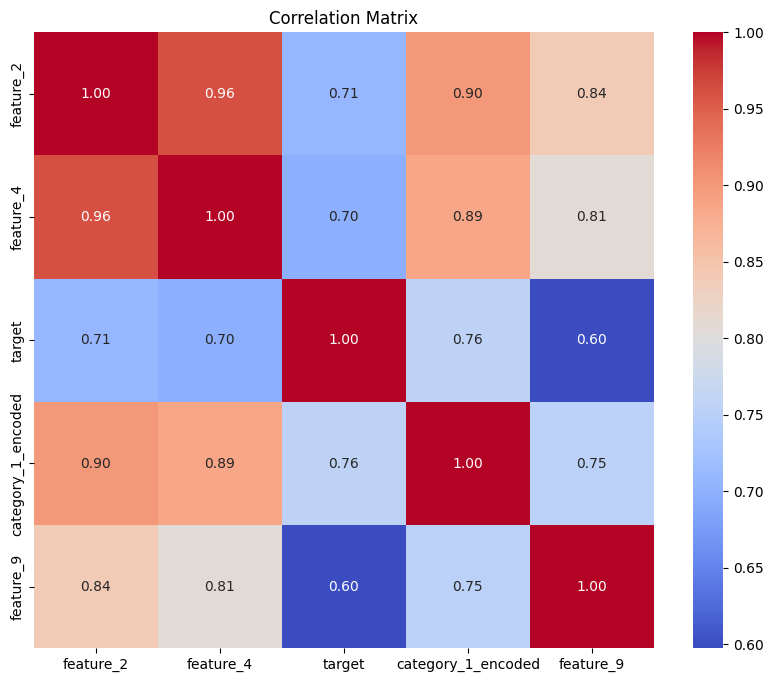

In [ ]:
# plot heatmap that visualize the correlation matrix
correlation_matrix = df_3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#feature scaling
scaler = MinMaxScaler()
for feature in df_3:
    df_3[feature] = scaler.fit_transform(df_3[[feature]])

print(df_3.head())

   feature_2  feature_4  target  category_1_encoded  feature_9
0   0.602870   0.575676     1.0            0.666667   0.335249
1   0.493050   0.537082     0.0            0.333333   0.225439
2   0.625464   0.654372     1.0            1.000000   0.423491
3   0.740199   0.738960     1.0            1.000000   0.600099
4   0.453284   0.461068     0.0            0.333333   0.205036


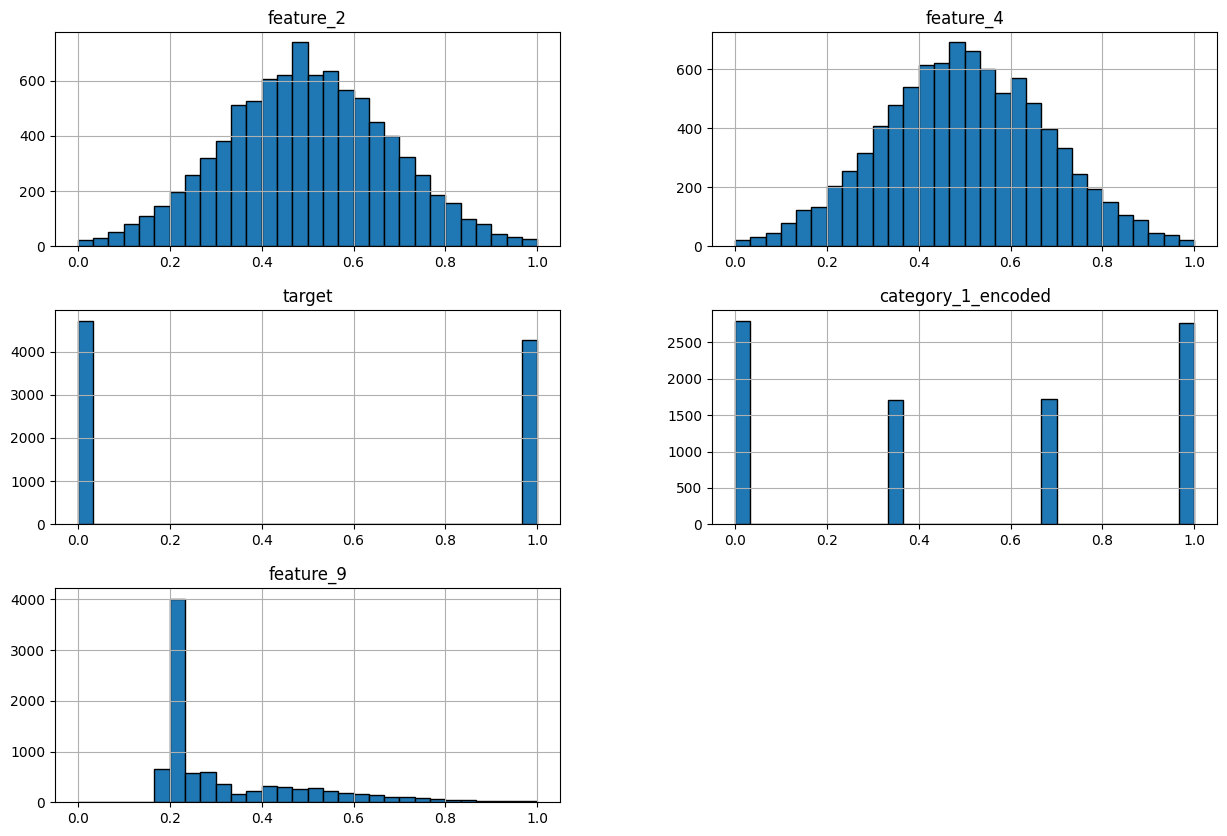

In [ ]:
df_3.hist(bins = 30, figsize=(15,10), edgecolor = 'black')
plt.show()

# V. **MODELING**

In [ ]:
df_3.head()

feature_2  feature_4  target  category_1_encoded  feature_9
0   0.602870   0.575676     1.0            0.666667   0.335249
1   0.493050   0.537082     0.0            0.333333   0.225439
2   0.625464   0.654372     1.0            1.000000   0.423491
3   0.740199   0.738960     1.0            1.000000   0.600099
4   0.453284   0.461068     0.0            0.333333   0.205036

In [ ]:
X = df_3.drop('target', axis=1)
y = df_3['target']

In [ ]:
X.head()

feature_2  feature_4  category_1_encoded  feature_9
0   0.602870   0.575676            0.666667   0.335249
1   0.493050   0.537082            0.333333   0.225439
2   0.625464   0.654372            1.000000   0.423491
3   0.740199   0.738960            1.000000   0.600099
4   0.453284   0.461068            0.333333   0.205036

In [ ]:
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: target, dtype: float64

In [ ]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(len(X_train))
print(len(X_test))

7200
1800


In [ ]:
from google.colab import drive

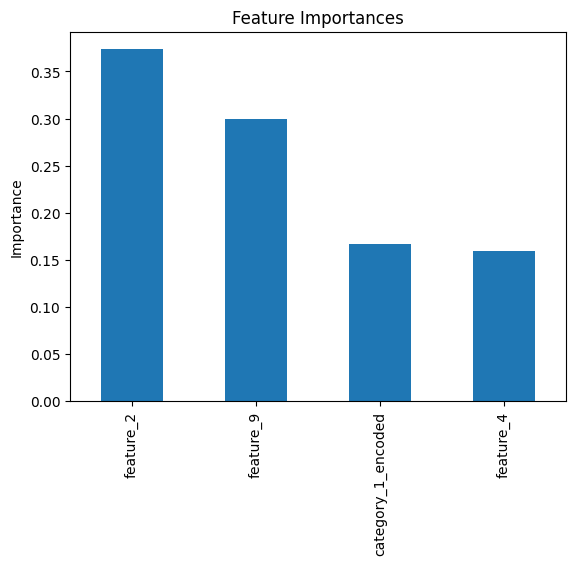

0.8422222222222222
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       947
         1.0       0.84      0.83      0.83       853

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800

[[812 135]
 [149 704]]


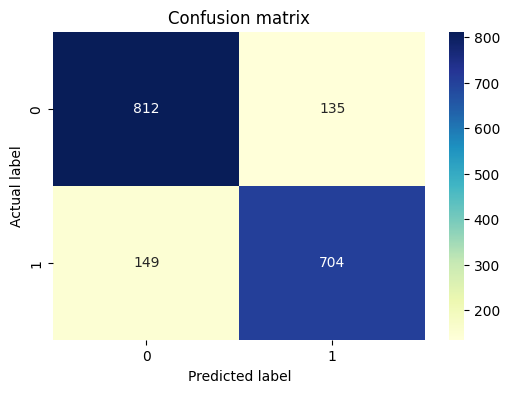

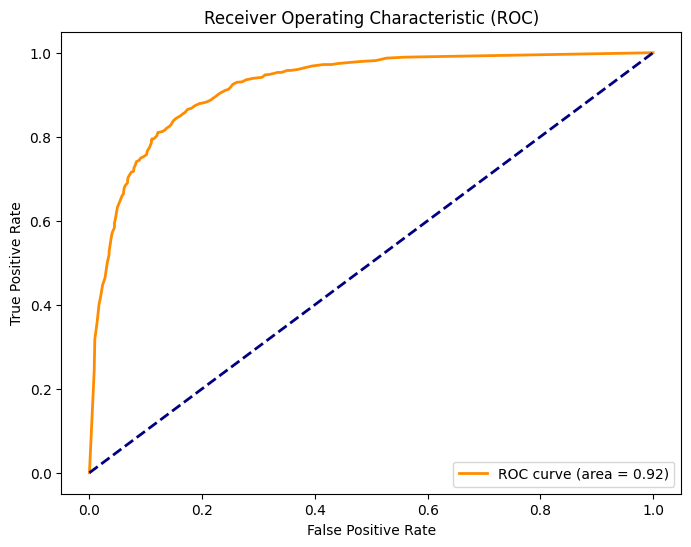

Random Forest AUC: 0.9213237087315902
[0.82013889 0.83541667 0.83680556 0.85069444 0.83472222]
0.8355555555555556
0.009686442096757054


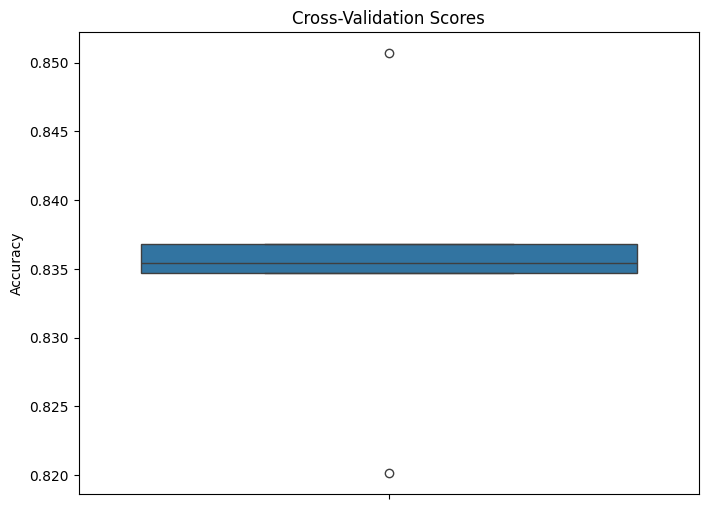

In [ ]:
# default Random Forest
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)

y_pred_rf = rf_default.predict(X_test)

#feature importance
feature_importances = rf_default.feature_importances_
forest_importances = pd.Series(feature_importances, index=X_train.columns)
forest_importances.sort_values(ascending=False, inplace=True)
forest_importances.plot(kind='bar', title='Feature Importances')
plt.ylabel('Importance')
plt.show()

#showing accuracy, precision, recall, and F1-score
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#confusion matrix
print(confusion_matrix(y_test, y_pred_rf))
plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_rf)), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#ROC-AUC curve
y_rf_probs = rf_default.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print(f"Random Forest AUC: {roc_auc}")

#cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_default,X_train,y_train,cv=kfold)
print(rf_scores)
print(rf_scores.mean())
print(rf_scores.std())
plt.figure(figsize=(8,6))
sns.boxplot(y=rf_scores)
plt.title("Cross-Validation Scores")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf_default, 'rf_default_model.pkl')


['rf_default_model.pkl']

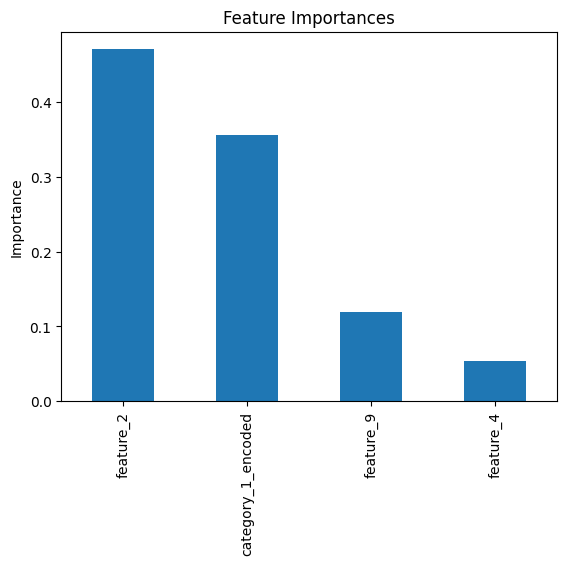

0.8644444444444445
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       947
         1.0       0.87      0.84      0.85       853

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800

[[837 110]
 [134 719]]


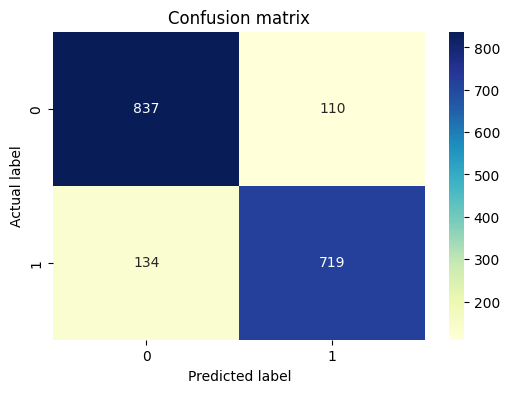

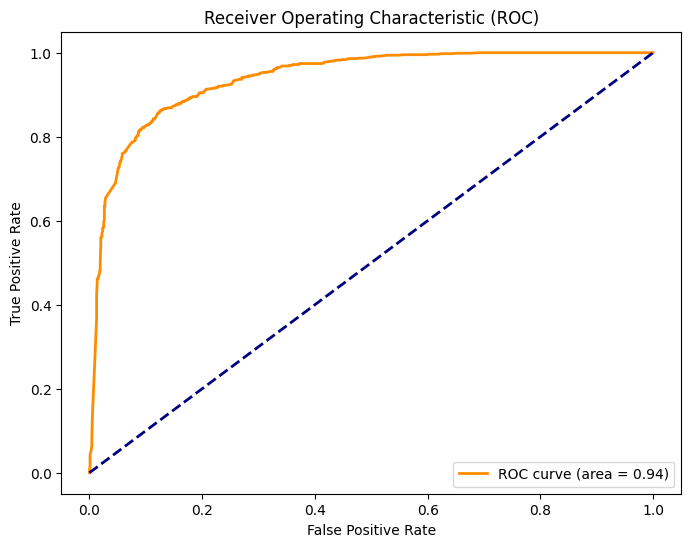

Random Forest AUC: 0.9384797552832355
[0.84861111 0.85625    0.85486111 0.87430556 0.85625   ]
0.8580555555555556
0.008602145870667802


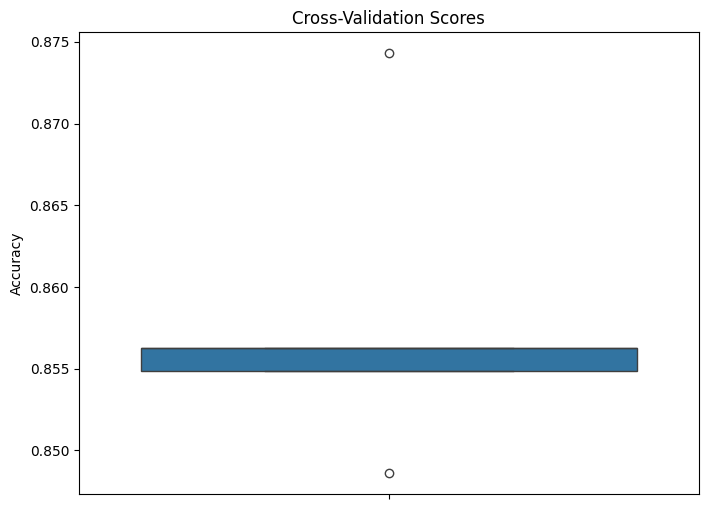

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

gb_default = GradientBoostingClassifier()
gb_default.fit(X_train,y_train)
gb_default.score(X_test,y_test)

y_pred_gb = gb_default.predict(X_test)

#feature importance
feature_importances = gb_default.feature_importances_
gb_importances = pd.Series(feature_importances, index=X_train.columns)
gb_importances.sort_values(ascending=False, inplace=True)
gb_importances.plot(kind='bar', title='Feature Importances')
plt.ylabel('Importance')
plt.show()

#accuracy, precision, recall, F1-score
print(accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

#confusion matrix
print(confusion_matrix(y_test, y_pred_gb))
plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_gb)), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#ROC-AUC curve
y_probs = gb_default.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print(f"Random Forest AUC: {roc_auc}")

#cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gb_scores = cross_val_score(gb_default,X_train,y_train,cv=kfold)
print(gb_scores)
print(gb_scores.mean())
print(gb_scores.std())
plt.figure(figsize=(8,6))
sns.boxplot(y=gb_scores)
plt.title("Cross-Validation Scores")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
joblib.dump(gb_default, 'gb_default_model.pkl')

['gb_default_model.pkl']

0.8616666666666667
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       947
         1.0       0.87      0.83      0.85       853

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800

[[842 105]
 [144 709]]


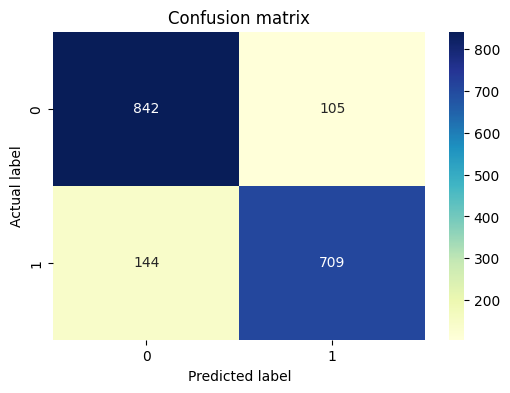

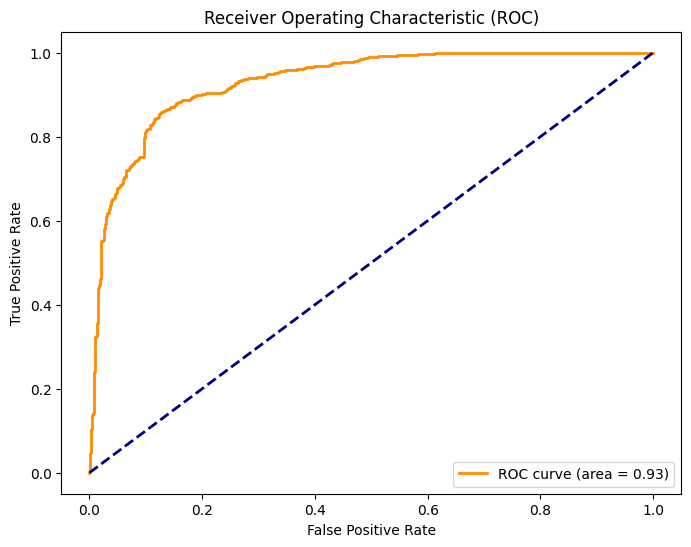

Random Forest AUC: 0.9317187242739768
[0.84236111 0.84652778 0.85138889 0.86875    0.85138889]
0.8520833333333334
0.008990306851490153


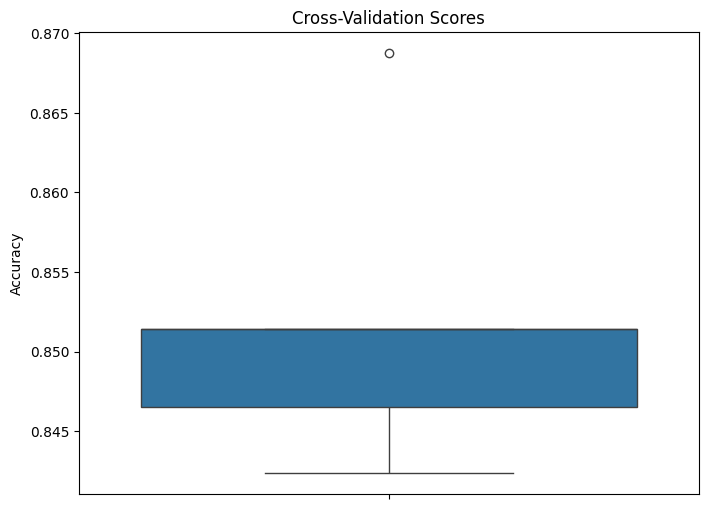

In [ ]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

clf1 = LogisticRegression(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = DecisionTreeClassifier(random_state=42)

soft_voting = VotingClassifier(estimators=[('lr',clf1),('svc',clf2),('dt',clf3)],voting='soft')
soft_voting.fit(X_train,y_train)
soft_voting.score(X_test,y_test)

y_pred_soft = soft_voting.predict(X_test)

#showing accuracy, precision, recall, and F1-score
print(accuracy_score(y_test, y_pred_soft))
print(classification_report(y_test, y_pred_soft))

#confusion matrix
print(confusion_matrix(y_test, y_pred_soft))
plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_soft)), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#ROC-AUC curve
y_voting_probs = soft_voting.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_voting_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print(f"Random Forest AUC: {roc_auc}")

#cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
voting_scores = cross_val_score(soft_voting,X_train,y_train,cv=kfold)
print(voting_scores)
print(voting_scores.mean())
print(voting_scores.std())
plt.figure(figsize=(8,6))
sns.boxplot(y=voting_scores)
plt.title("Cross-Validation Scores")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
joblib.dump(soft_voting, 'soft_voting_model.pkl')

['soft_voting_model.pkl']

# **VI. Hyperparameter tuning**


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Random Forest Classifier Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5,10,15],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_leaf_nodes': [5,10,15]
}

rf_tuned = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)




Best Parameters: {'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


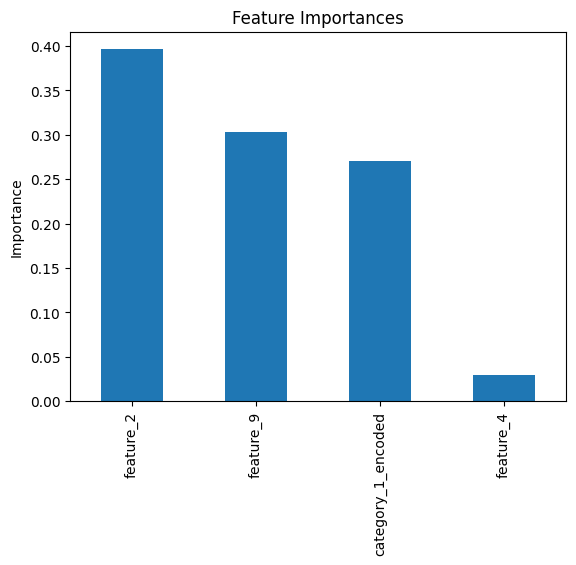

0.8638888888888889
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       947
         1.0       0.87      0.84      0.85       853

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800

[[839 108]
 [137 716]]


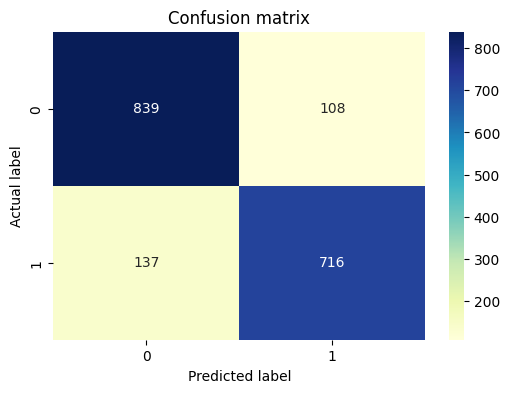

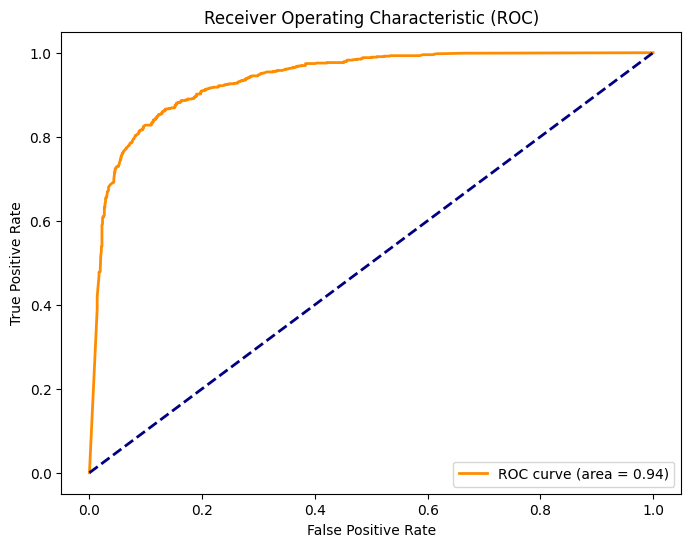

Random Forest AUC: 0.9376552845971298
[0.84930556 0.85625    0.85625    0.88333333 0.86041667]
0.861111111111111
0.011669973076444445


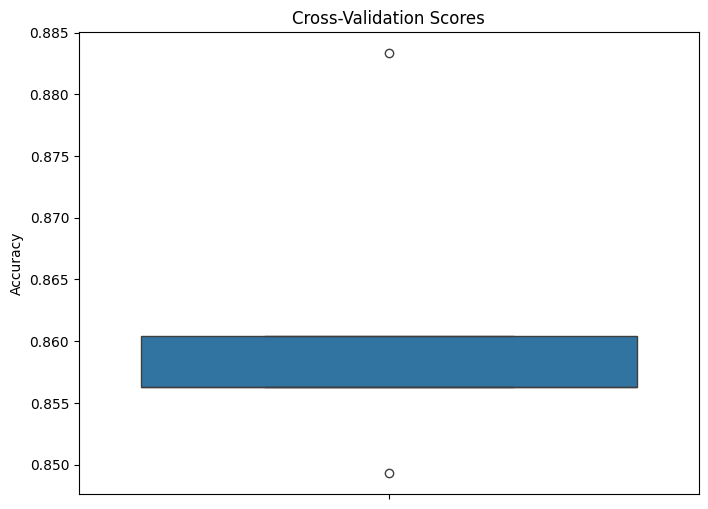

In [ ]:
#Random Forest tuning
rf_tuning = RandomForestClassifier(n_estimators=100, max_leaf_nodes=10, min_samples_leaf=1,max_depth=10,min_samples_split=10, random_state=42)
rf_tuning.fit(X_train, y_train)

y_pred_rf_tuning = rf_tuning.predict(X_test)

#feature importance
feature_importances = rf_tuning.feature_importances_
forest_importances = pd.Series(feature_importances, index=X_train.columns)
forest_importances.sort_values(ascending=False, inplace=True)
forest_importances.plot(kind='bar', title='Feature Importances')
plt.ylabel('Importance')
plt.show()

#showing accuracy, precision, recall, and F1-score
print(accuracy_score(y_test, y_pred_rf_tuning))
print(classification_report(y_test, y_pred_rf_tuning))

#confusion matrix
print(confusion_matrix(y_test, y_pred_rf_tuning))
plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_rf_tuning)), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#ROC-AUC curve
y_rf_tuning_probs = rf_tuning.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_rf_tuning_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print(f"Random Forest AUC: {roc_auc}")

#cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_tuning_scores = cross_val_score(rf_tuning,X_train,y_train,cv=kfold)
print(rf_tuning_scores)
print(rf_tuning_scores.mean())
print(rf_tuning_scores.std())
plt.figure(figsize=(8,6))
sns.boxplot(y=rf_tuning_scores)
plt.title("Cross-Validation Scores")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
joblib.dump(rf_tuning, 'rf_tuning_model.pkl')

['rf_tuning_model.pkl']

In [ ]:
#Gradient Boosting Tuning
from sklearn.model_selection import RandomizedSearchCV
gb_param = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1, 0.01, 0.001],
    'min_samples_split':[2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_depth':[5,10,15]
}
gb_tuning = GradientBoostingClassifier()
gb_random_search = RandomizedSearchCV(estimator=gb_tuning, param_distributions=gb_param, cv=5, n_iter=30, random_state=42, scoring = "accuracy")

gb_random_search.fit(X_train, y_train)

print("Best Parameters:", gb_random_search.best_params_)
print("Best CV score:", gb_random_search.best_score_)





Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.01}
Best CV score: 0.8598611111111112


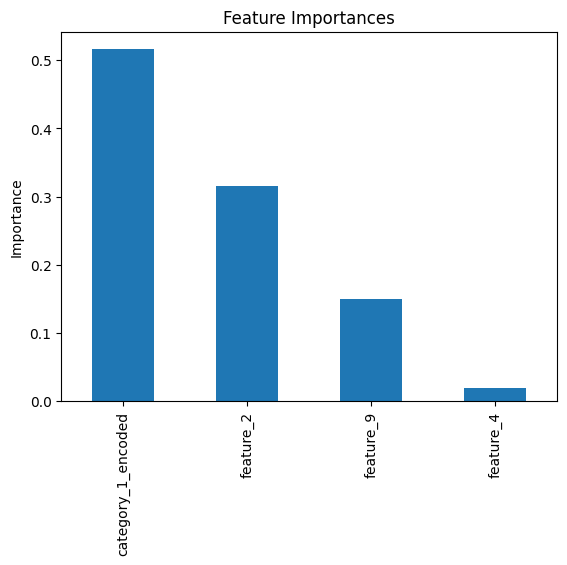

0.8638888888888889
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       947
         1.0       0.88      0.83      0.85       853

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800

[[846 101]
 [144 709]]


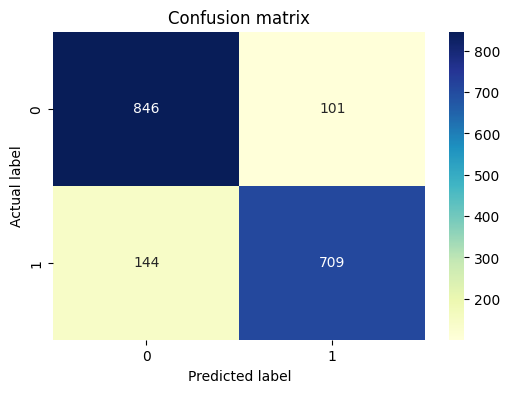

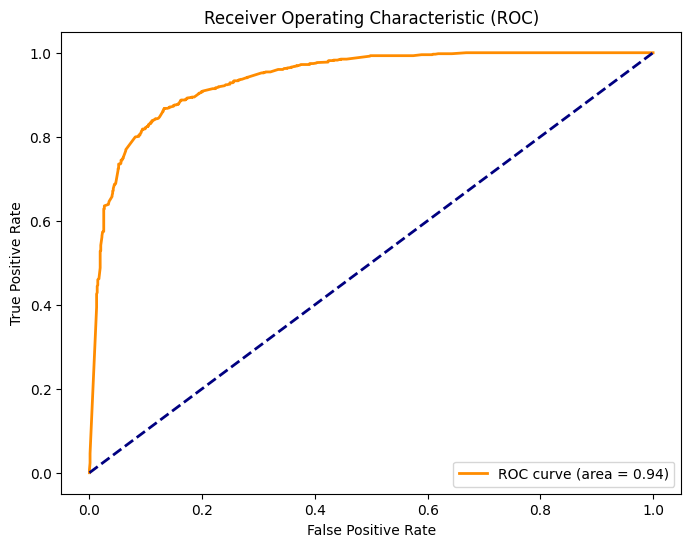

Random Forest AUC: 0.9381597467661809
[0.84444444 0.85625    0.84930556 0.875      0.85833333]
0.8566666666666667
0.01041759255144399


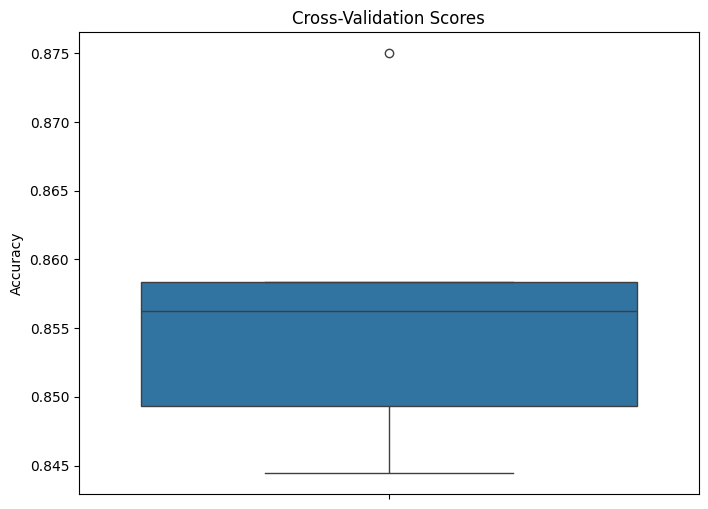

In [ ]:
#Gradient Boosting Tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

gb_tuned = GradientBoostingClassifier(n_estimators = 100, min_samples_split=5, min_samples_leaf=2, max_depth=5, learning_rate=0.01, random_state=42)
gb_tuned.fit(X_train,y_train)
gb_tuned.score(X_test,y_test)

y_pred_gb_tuned = gb_tuned.predict(X_test)

#feature importance
feature_importances = gb_tuned.feature_importances_
gb_importances = pd.Series(feature_importances, index=X_train.columns)
gb_importances.sort_values(ascending=False, inplace=True)
gb_importances.plot(kind='bar', title='Feature Importances')
plt.ylabel('Importance')
plt.show()

#accuracy, precision, recall, F1-score
print(accuracy_score(y_test, y_pred_gb_tuned))
print(classification_report(y_test, y_pred_gb_tuned))

#confusion matrix
print(confusion_matrix(y_test, y_pred_gb_tuned))
plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_gb_tuned)), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#ROC-AUC curve
y_probs_tuned = gb_tuned.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_probs_tuned)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print(f"Random Forest AUC: {roc_auc}")

#cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gb_tuned_scores = cross_val_score(gb_tuned,X_train,y_train,cv=kfold)
print(gb_tuned_scores)
print(gb_tuned_scores.mean())
print(gb_tuned_scores.std())
plt.figure(figsize=(8,6))
sns.boxplot(y=gb_tuned_scores)
plt.title("Cross-Validation Scores")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
joblib.dump(gb_tuned, 'gb_tuned_model.pkl')

['gb_tuned_model.pkl']

In [ ]:
#Voting Classifier Tuning
vt_params = {
    'lr__C': [0.1, 1, 10],
    'svc__C': [0.1,1,10],
    'dt__max_depth':[5,10,15],
    'dt__min_samples_split':[2,5,10],
    'dt__min_samples_leaf': [1,2,4]

}
vt_tuning = VotingClassifier(estimators=[('lr',clf1),('svc',clf2),('dt',clf3)],voting='soft')
vt_random_search = RandomizedSearchCV(estimator=vt_tuning, param_distributions=vt_params)

vt_random_search.fit(X_train, y_train)

print("Best Parameters:", vt_random_search.best_params_)
print("Best CV score:", vt_random_search.best_score_)

Best Parameters: {'svc__C': 10, 'lr__C': 1, 'dt__min_samples_split': 10, 'dt__min_samples_leaf': 4, 'dt__max_depth': 10}
Best CV score: 0.8584722222222222


0.8605555555555555
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87       947
         1.0       0.85      0.86      0.85       853

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800

[[816 131]
 [120 733]]


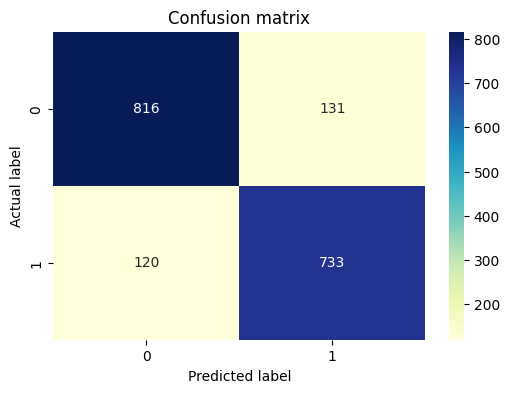

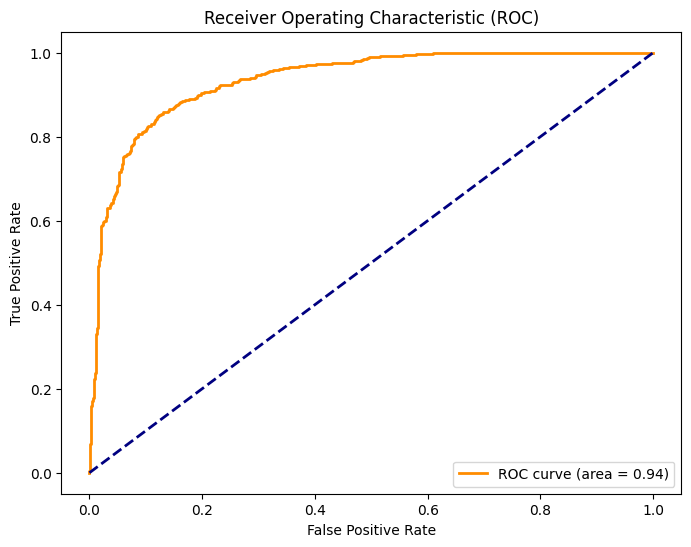

Random Forest AUC: 0.9353483760031988
[0.84583333 0.85347222 0.85416667 0.87708333 0.85833333]
0.8577777777777778
0.010461938658481383


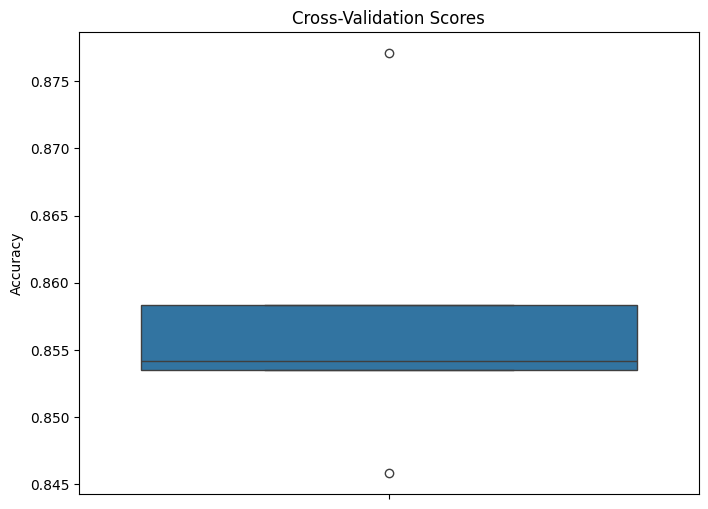

In [ ]:
#Voting Classifier Tuning
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

clf1_tuned = LogisticRegression(C =1,random_state=42)
clf2_tuned = SVC(C = 10, probability=True, random_state=42)
clf3_tuned = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=4, min_samples_split = 10, random_state=42)


soft_voting_tuned = VotingClassifier(estimators=[('lr',clf1_tuned),('svc',clf2_tuned),('dt',clf3_tuned)],voting='soft')
soft_voting_tuned.fit(X_train,y_train)
soft_voting_tuned.score(X_test,y_test)

y_pred_soft_tuned = soft_voting_tuned.predict(X_test)

#showing accuracy, precision, recall, and F1-score
print(accuracy_score(y_test, y_pred_soft_tuned))
print(classification_report(y_test, y_pred_soft_tuned))

#confusion matrix
print(confusion_matrix(y_test, y_pred_soft_tuned))
plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_soft_tuned)), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#ROC-AUC curve
y_voting_probs = soft_voting_tuned.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_voting_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print(f"Random Forest AUC: {roc_auc}")

#cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
voting_scores = cross_val_score(soft_voting_tuned,X_train,y_train,cv=kfold)
print(voting_scores)
print(voting_scores.mean())
print(voting_scores.std())
plt.figure(figsize=(8,6))
sns.boxplot(y=voting_scores)
plt.title("Cross-Validation Scores")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
joblib.dump(soft_voting_tuned, 'soft_voting_tuned_model.pkl')

['soft_voting_tuned_model.pkl']

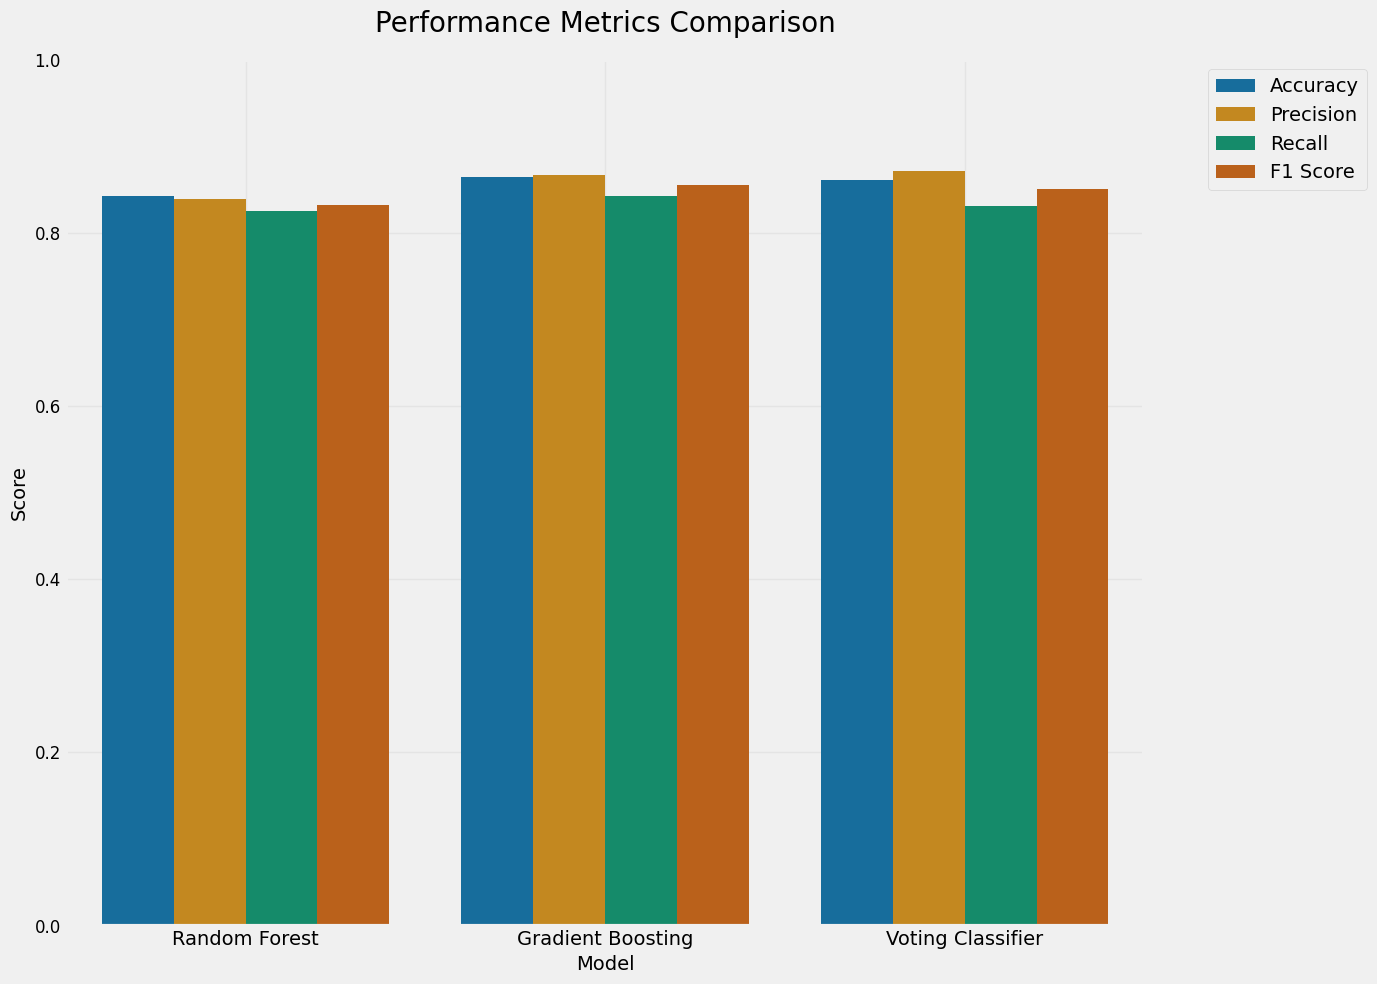

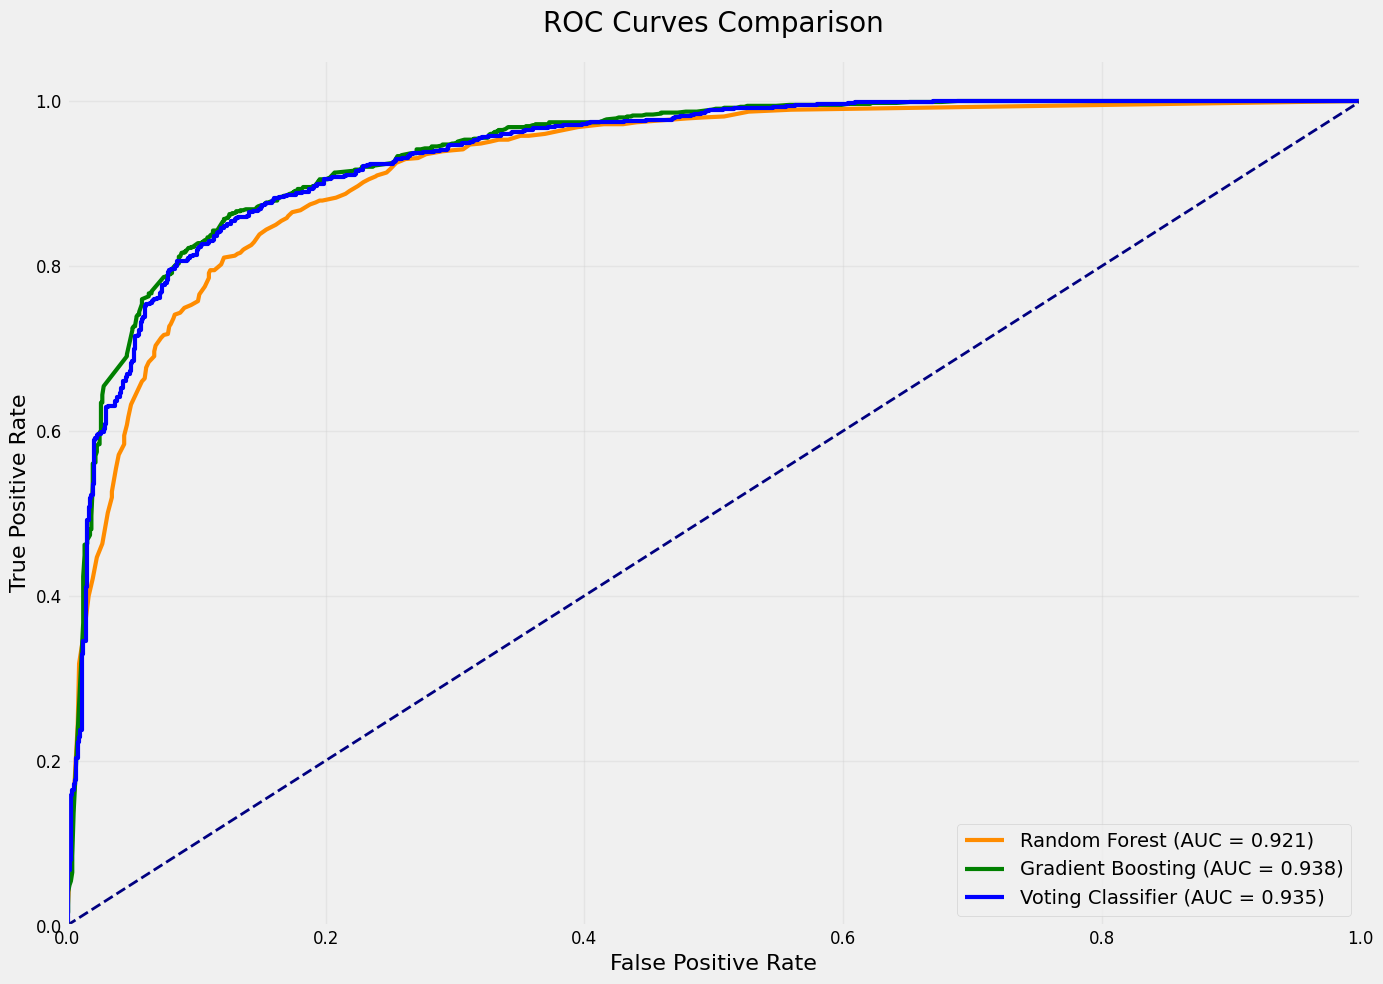

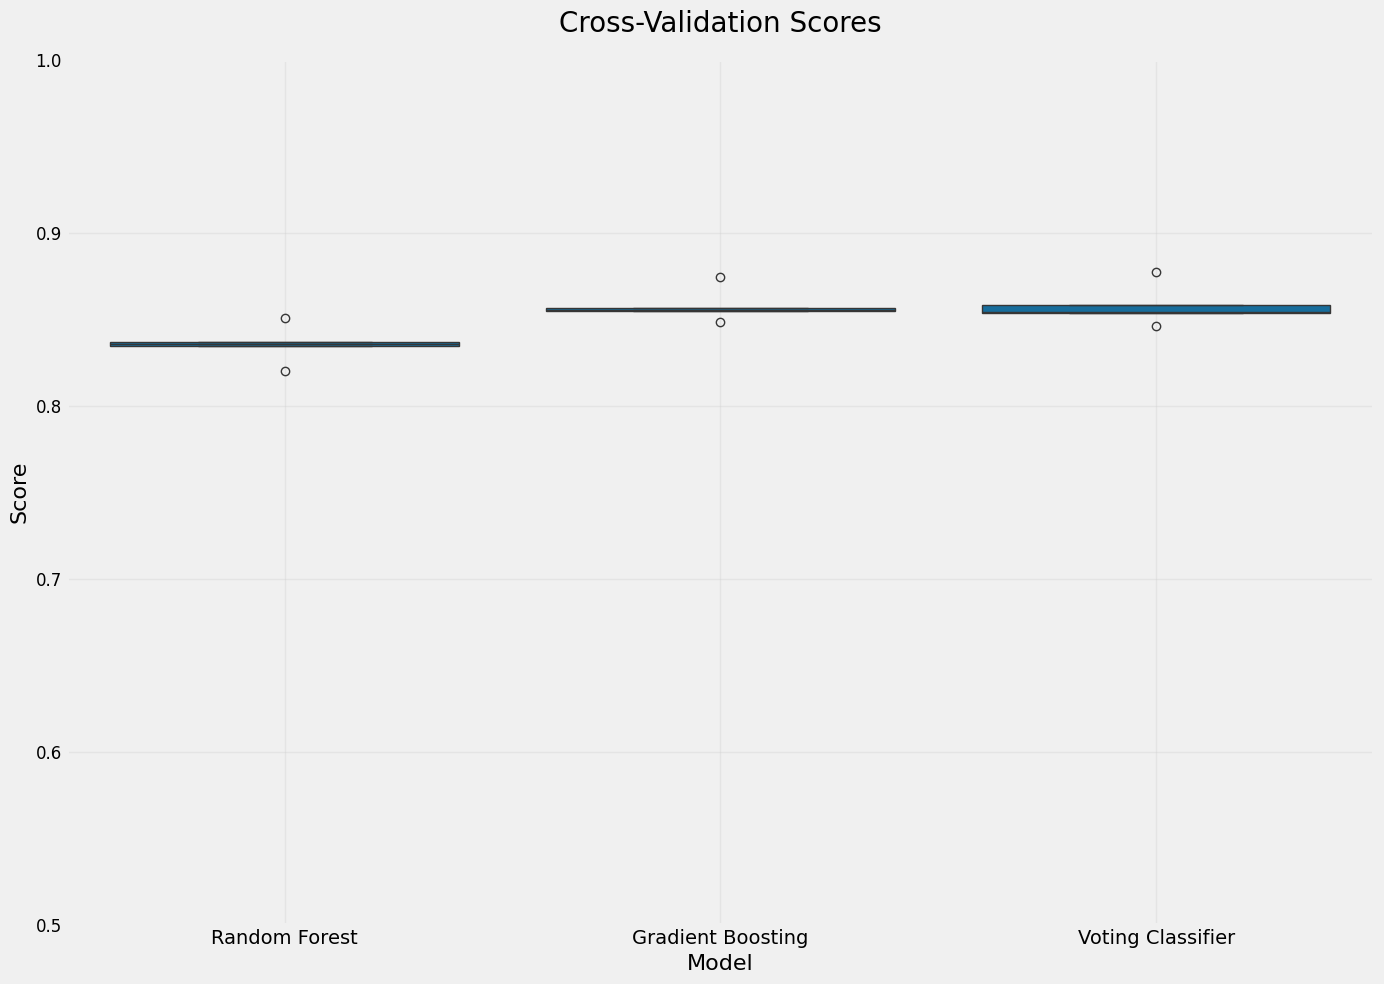

<Figure size 1400x1000 with 0 Axes>

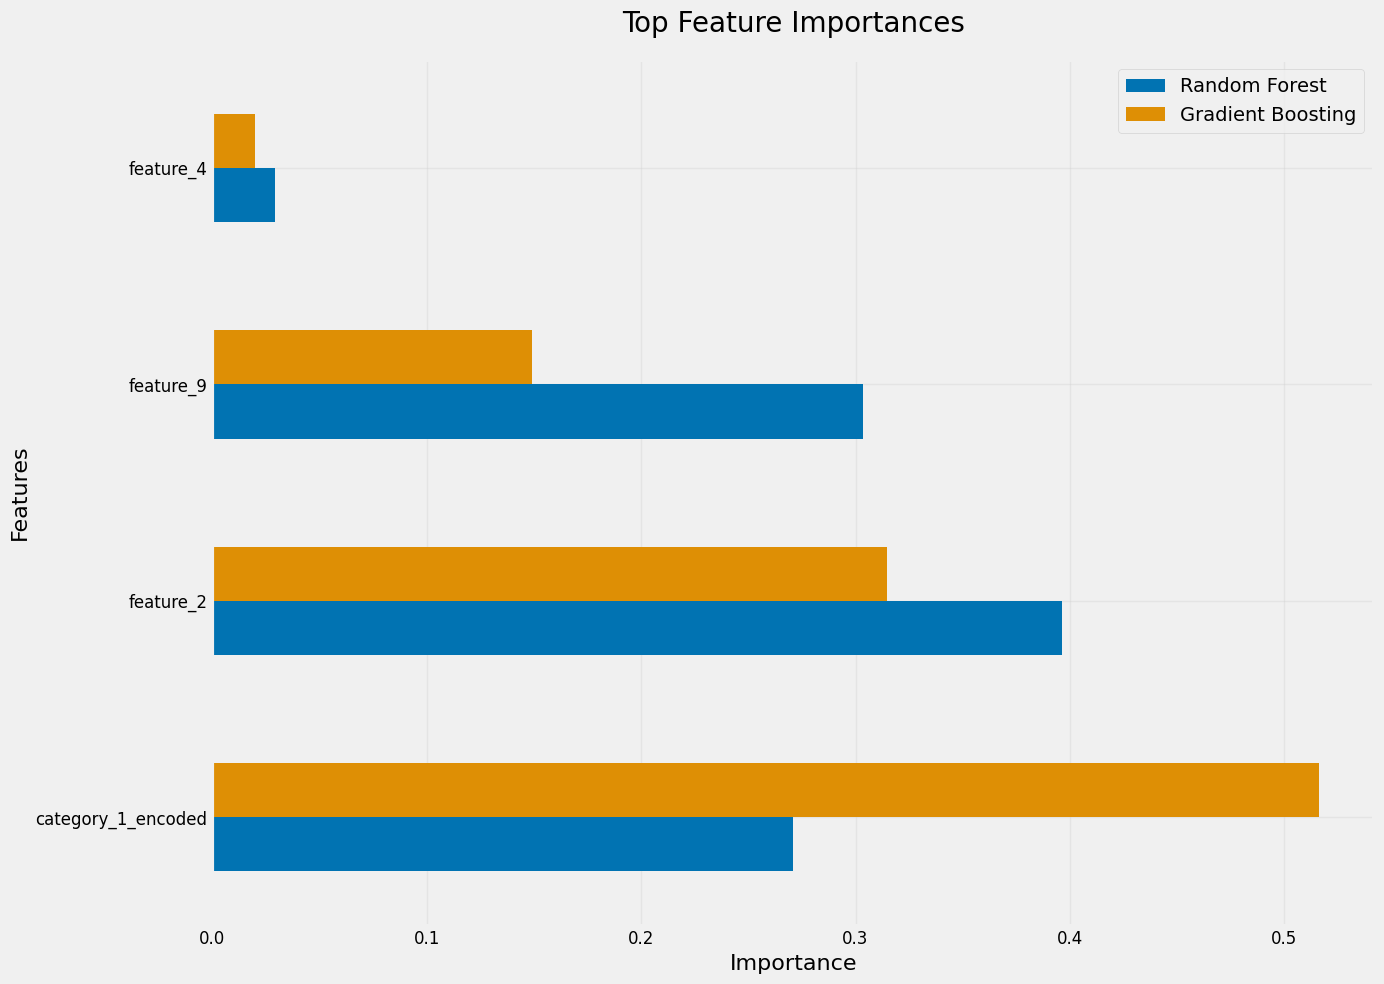

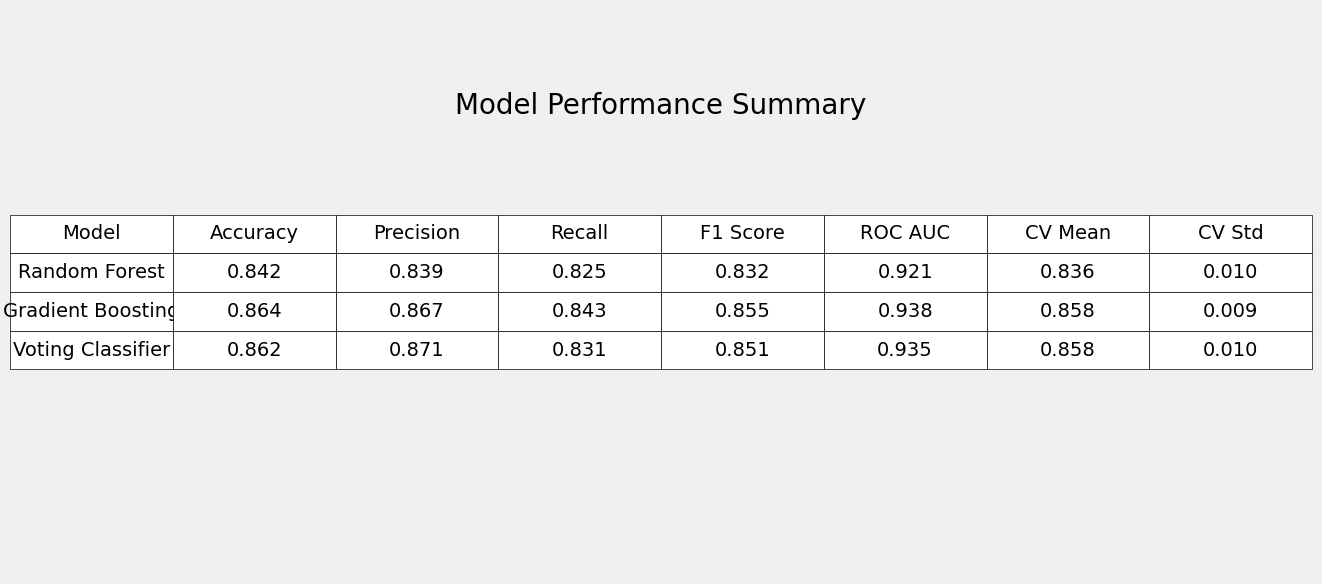

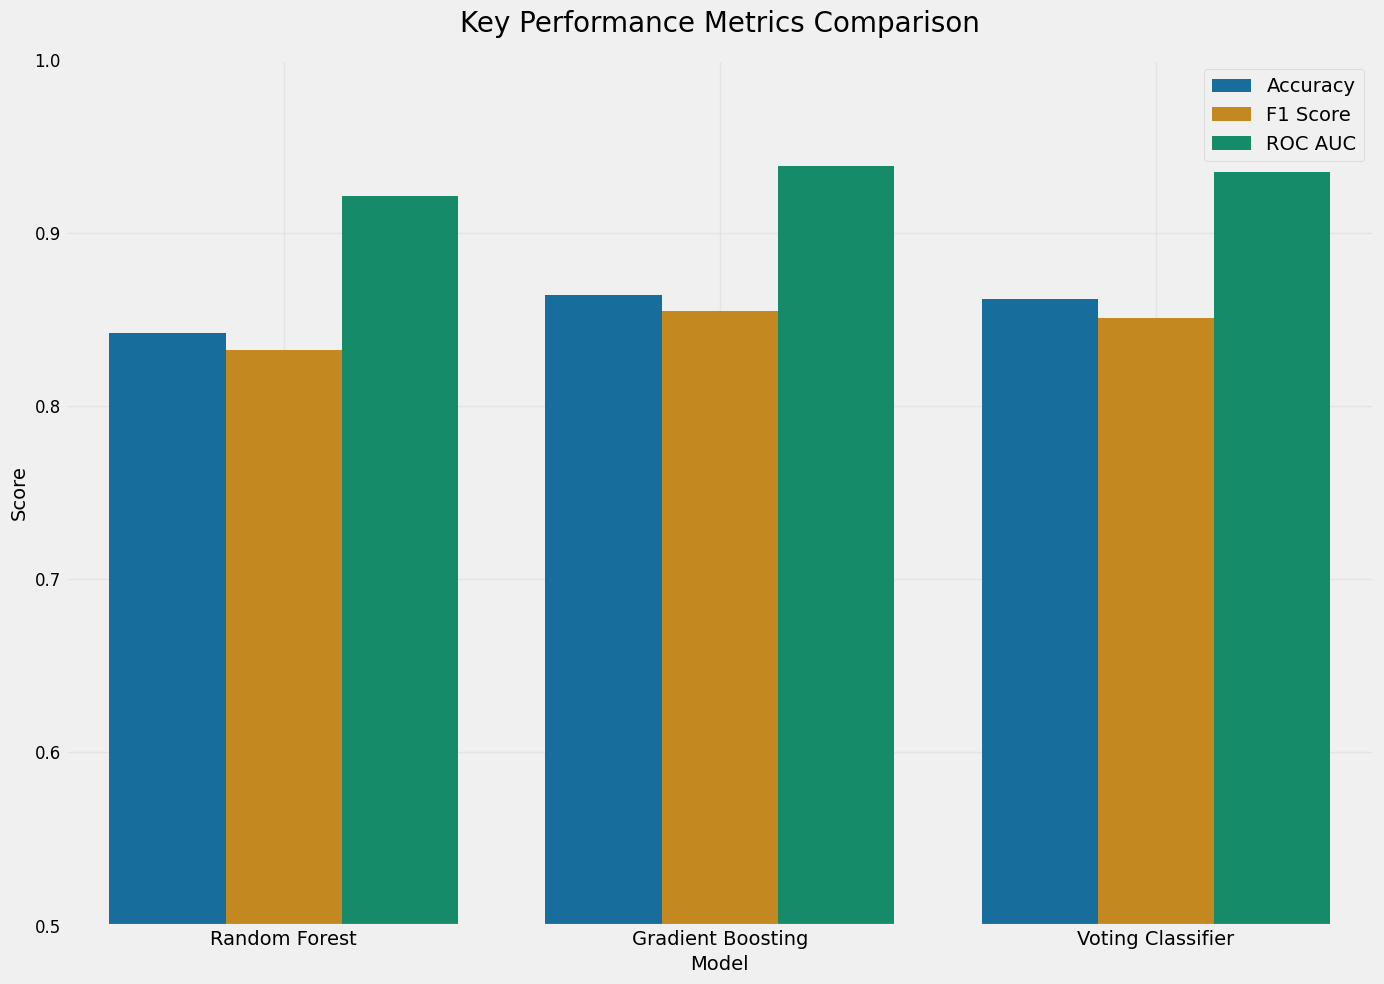

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Set style for better visualization
plt.style.use('fivethirtyeight')
sns.set_palette("colorblind")

# Increase default font size for better readability in screenshots
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Assuming you've already trained the models and generated predictions
# Calculate metrics for each model
models = ['Random Forest', 'Gradient Boosting', 'Voting Classifier']
predictions = [y_pred_rf, y_pred_gb, y_pred_soft]
probabilities = [y_rf_probs, y_probs, y_voting_probs]
cv_scores = [rf_scores, gb_scores, voting_scores]

# Calculate metrics
accuracy = [accuracy_score(y_test, pred) for pred in predictions]
precision = [precision_score(y_test, pred) for pred in predictions]
recall = [recall_score(y_test, pred) for pred in predictions]
f1 = [f1_score(y_test, pred) for pred in predictions]
roc_auc_scores = [auc(roc_curve(y_test, prob)[0], roc_curve(y_test, prob)[1]) for prob in probabilities]
cv_means = [scores.mean() for scores in cv_scores]
cv_stds = [scores.std() for scores in cv_scores]

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc_scores,
    'CV Mean': cv_means,
    'CV Std': cv_stds
})

# Create individual plots with larger sizes and better spacing for screenshots

# 1. Performance Metrics Bar Chart
plt.figure(figsize=(14, 10))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
data_to_plot = pd.melt(metrics_df, id_vars=['Model'], value_vars=metrics_to_plot,
                      var_name='Metric', value_name='Score')
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=data_to_plot)
plt.title('Performance Metrics Comparison', fontsize=20, pad=20)
plt.ylim(0, 1)
plt.xticks(rotation=0, fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. ROC Curves for all models in one plot
plt.figure(figsize=(14, 10))
colors = ['darkorange', 'green', 'blue']
for i, model in enumerate(models):
    fpr, tpr, _ = roc_curve(y_test, probabilities[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=3,
             label=f'{model} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curves Comparison', fontsize=20, pad=20)
plt.legend(loc="lower right", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Cross-validation scores comparison
plt.figure(figsize=(14, 10))
cv_data = pd.DataFrame({
    'Model': np.repeat(models, [len(s) for s in cv_scores]),
    'CV Score': np.concatenate(cv_scores)
})
sns.boxplot(x='Model', y='CV Score', data=cv_data)
plt.title('Cross-Validation Scores', fontsize=20, pad=20)
plt.xticks(rotation=0, fontsize=14)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Model', fontsize=16)
plt.ylim(0.5, 1.0)  # Adjust as needed based on your actual scores
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cv_scores_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Feature importance comparison (for RF and GB only)
plt.figure(figsize=(14, 10))
top_n = 10  # Number of top features to show

# Make sure we have the feature importances series
if 'forest_importances' in locals() and 'gb_importances' in locals():
    # Get top features from both models
    rf_top_features = forest_importances.nlargest(top_n)
    gb_top_features = gb_importances.nlargest(top_n)

    # Create a combined DataFrame with all unique top features
    all_top_features = pd.DataFrame(index=sorted(set(rf_top_features.index) | set(gb_top_features.index)))
    all_top_features['Random Forest'] = forest_importances
    all_top_features['Gradient Boosting'] = gb_importances
    all_top_features = all_top_features.fillna(0)

    # Sort by the mean importance
    all_top_features['Mean'] = all_top_features.mean(axis=1)
    all_top_features = all_top_features.sort_values('Mean', ascending=False).head(top_n)
    del all_top_features['Mean']  # Remove the helper column

    # Plot the feature importances
    ax = all_top_features.plot(kind='barh', figsize=(14, 10))
    plt.title('Top Feature Importances', fontsize=20, pad=20)
    plt.xlabel('Importance', fontsize=16)
    plt.ylabel('Features', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# 5. Summary table of all metrics
plt.figure(figsize=(16, 6))
# Format the numbers to be more readable
metrics_df_display = metrics_df.copy()
for col in metrics_df_display.columns:
    if col != 'Model' and metrics_df_display[col].dtype != 'object':
        metrics_df_display[col] = metrics_df_display[col].map('{:.3f}'.format)

# Create a table with the metrics
plt.axis('off')
tbl = plt.table(cellText=metrics_df_display.values, colLabels=metrics_df_display.columns,
                loc='center', cellLoc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(1.5, 2.0)
plt.title('Model Performance Summary', fontsize=20, y=0.8)
plt.tight_layout()
plt.savefig('metrics_table.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Combined visualization of accuracy, F1, and ROC AUC in one chart
plt.figure(figsize=(14, 10))
combined_metrics = ['Accuracy', 'F1 Score', 'ROC AUC']
combined_data = pd.melt(metrics_df, id_vars=['Model'], value_vars=combined_metrics,
                        var_name='Metric', value_name='Score')

# Create a grouped bar chart
sns.barplot(x='Model', y='Score', hue='Metric', data=combined_data)
plt.title('Key Performance Metrics Comparison', fontsize=20, pad=20)
plt.ylim(0.5, 1)  # Set a reasonable y-limit to better show differences
plt.xticks(rotation=0, fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('combined_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

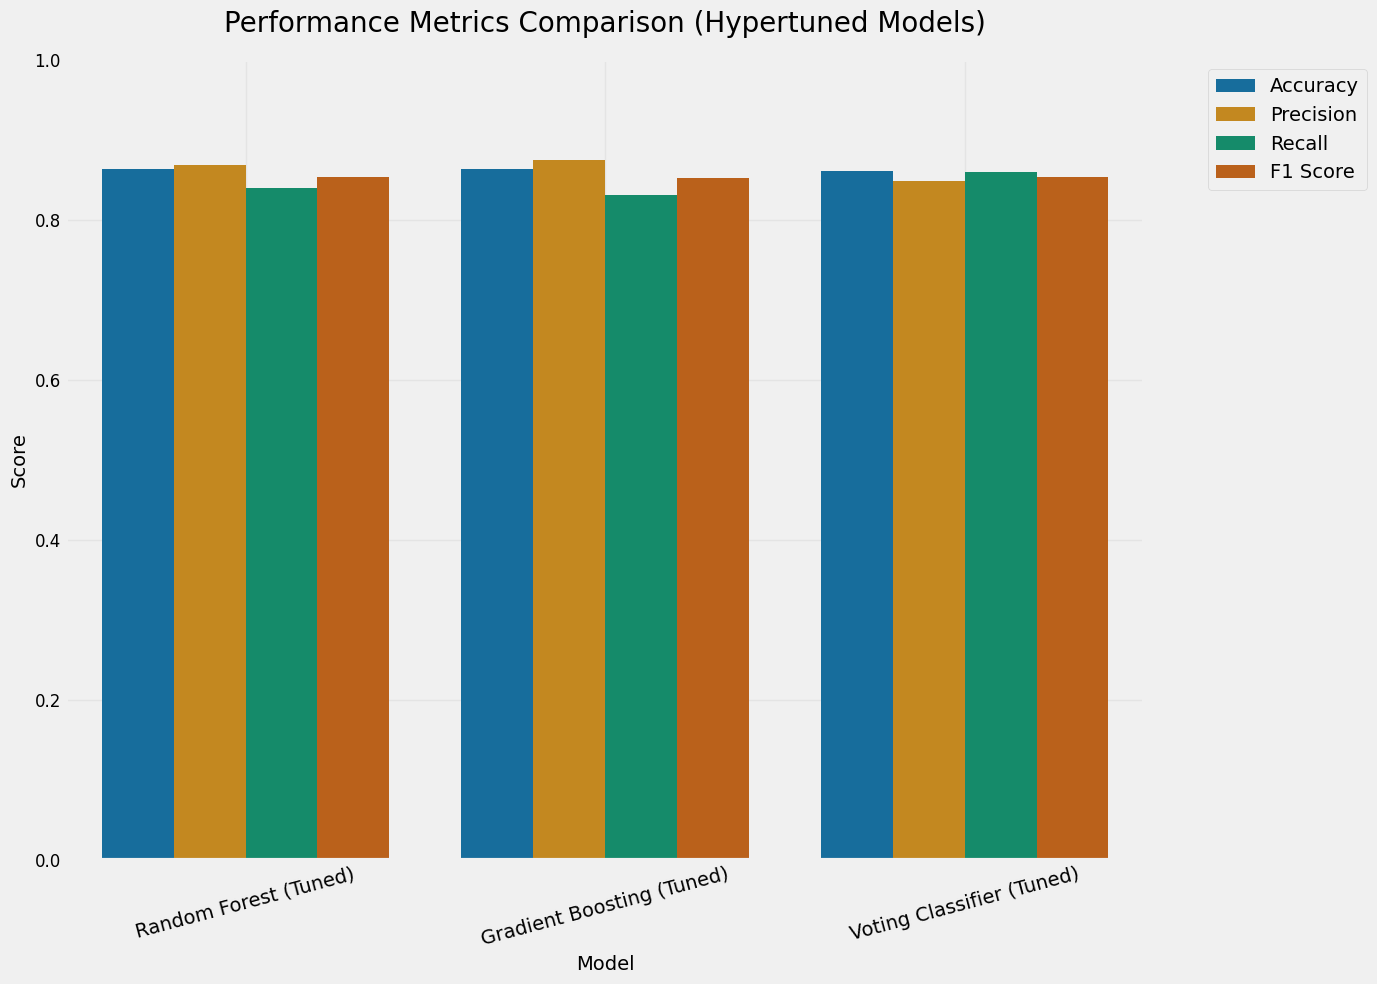

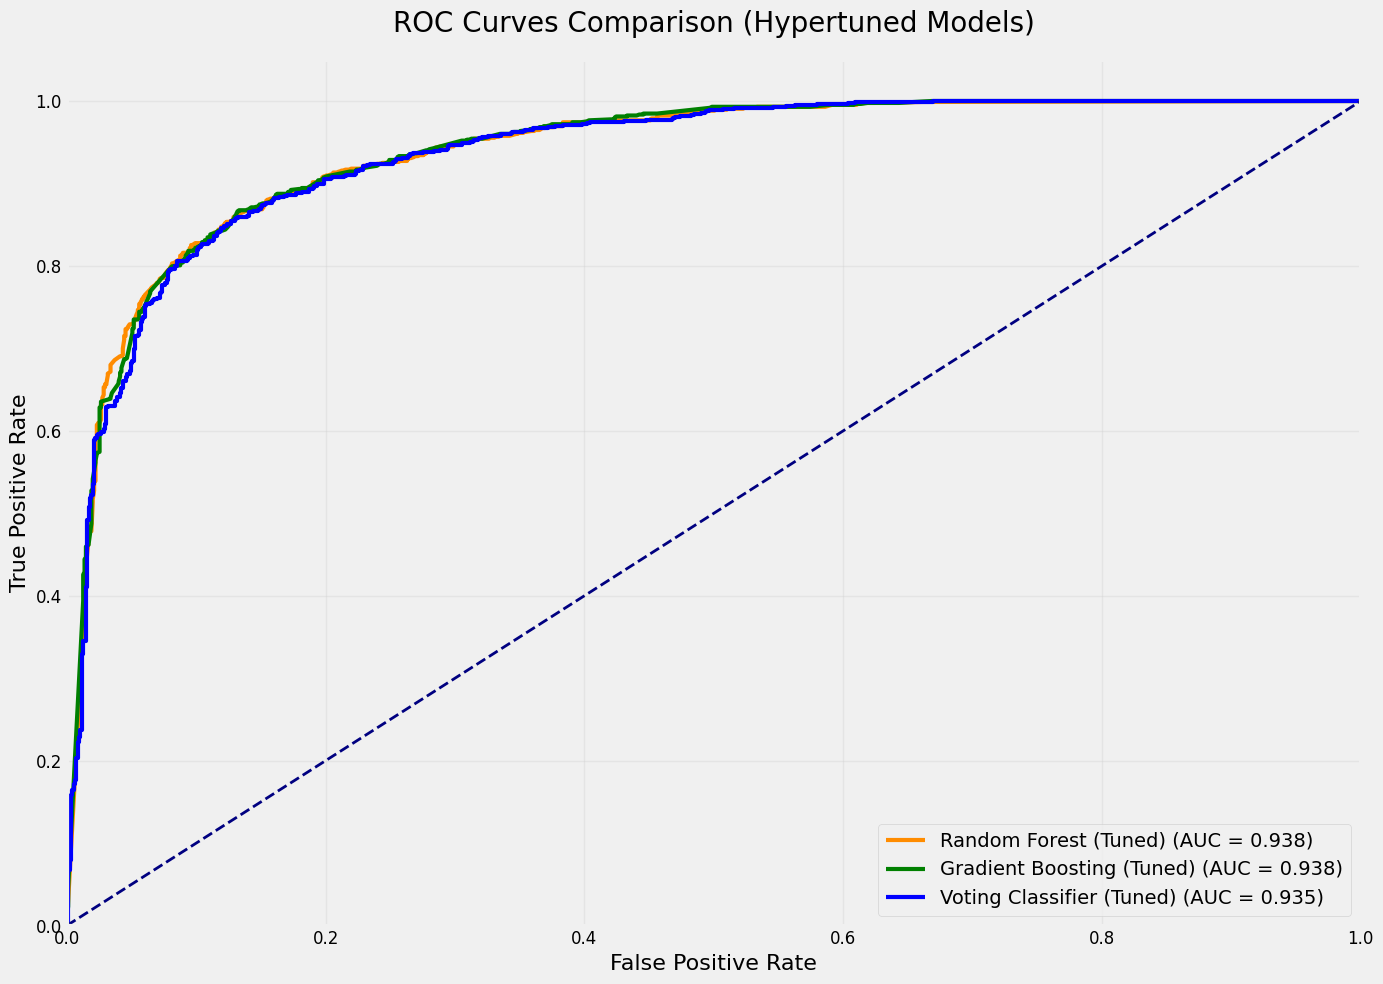

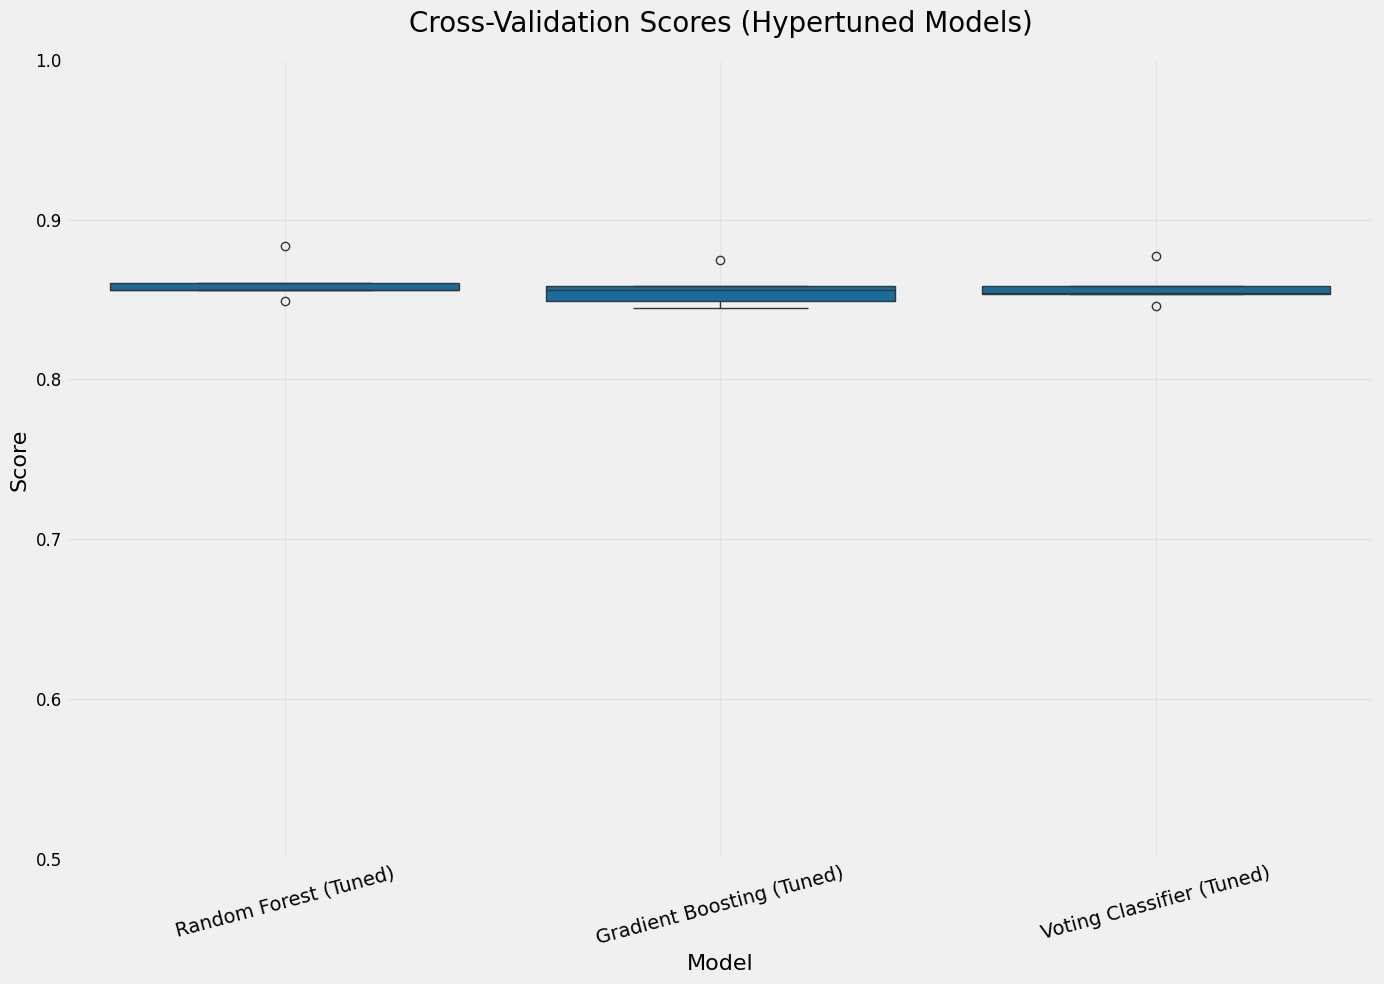

<Figure size 1400x1000 with 0 Axes>

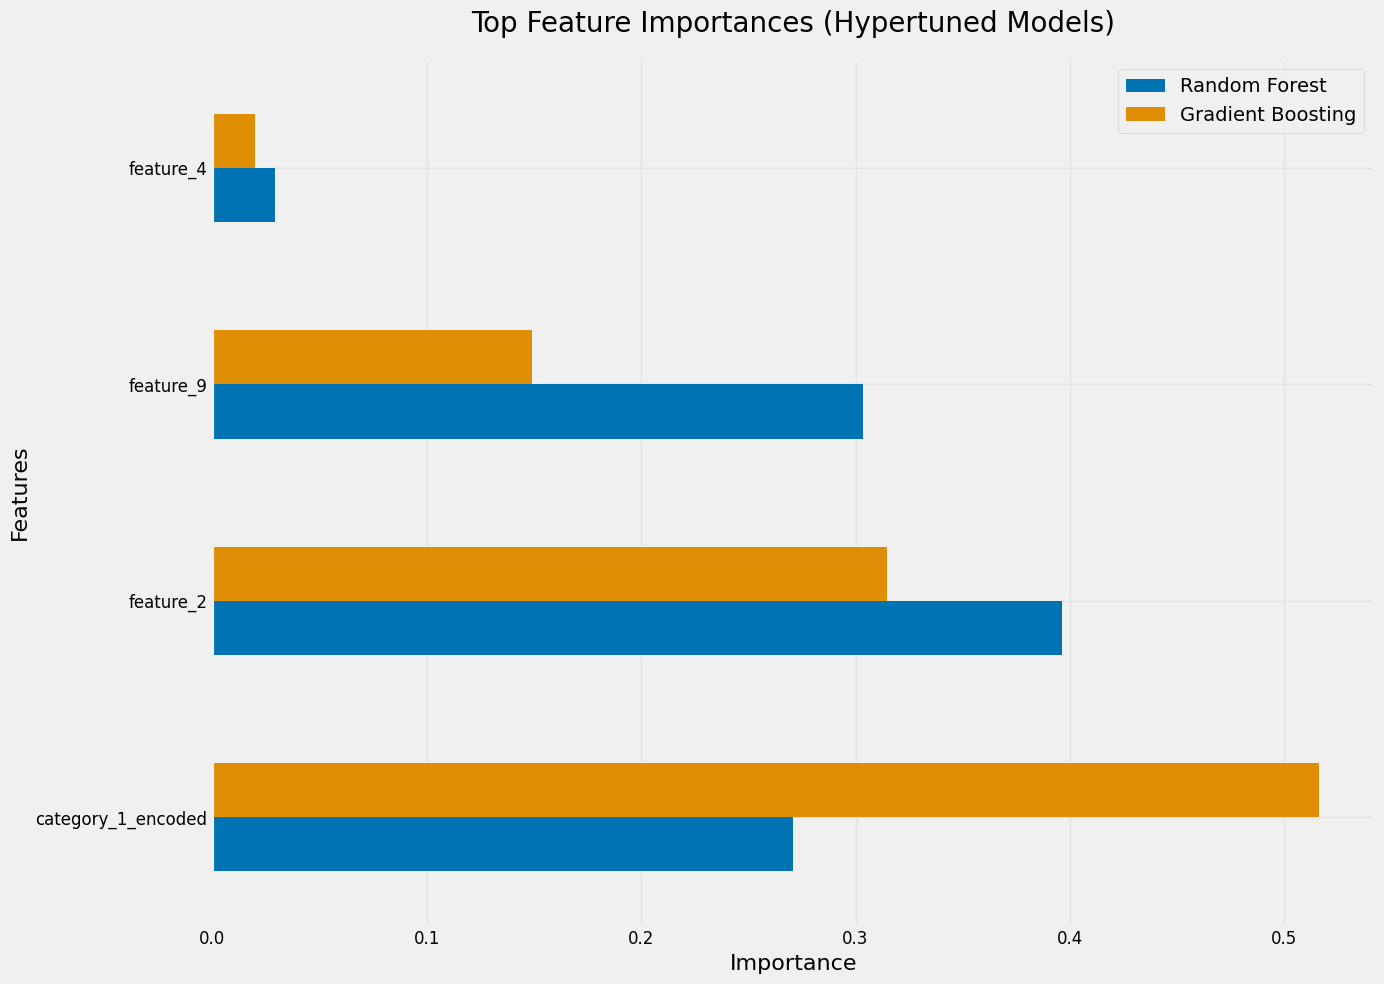

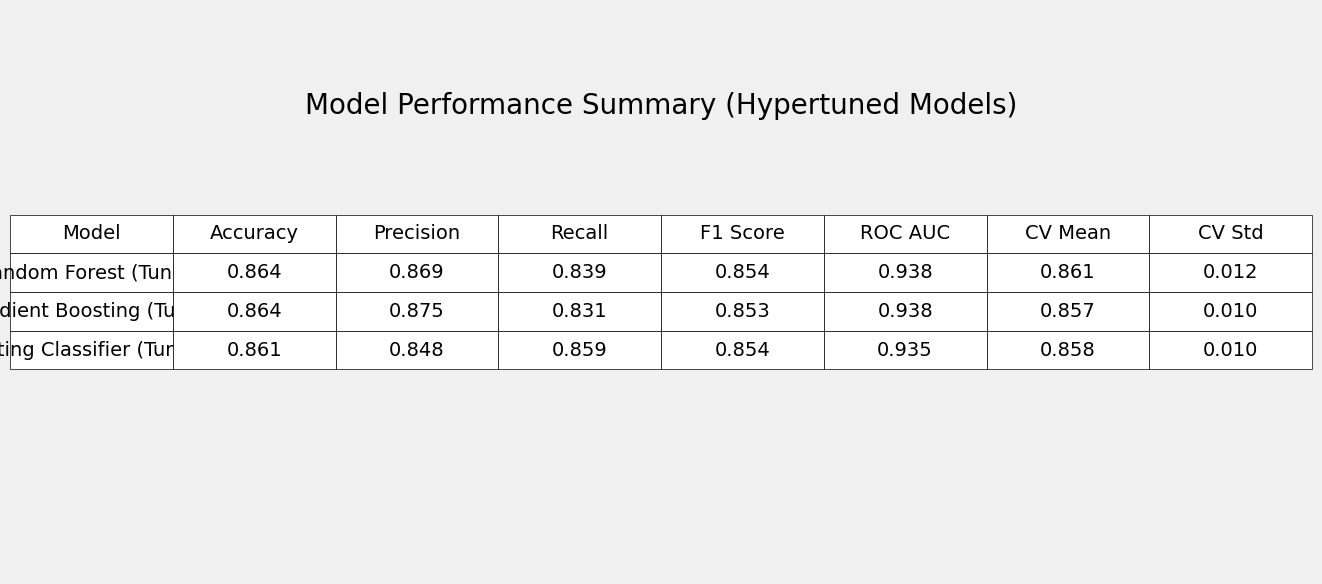

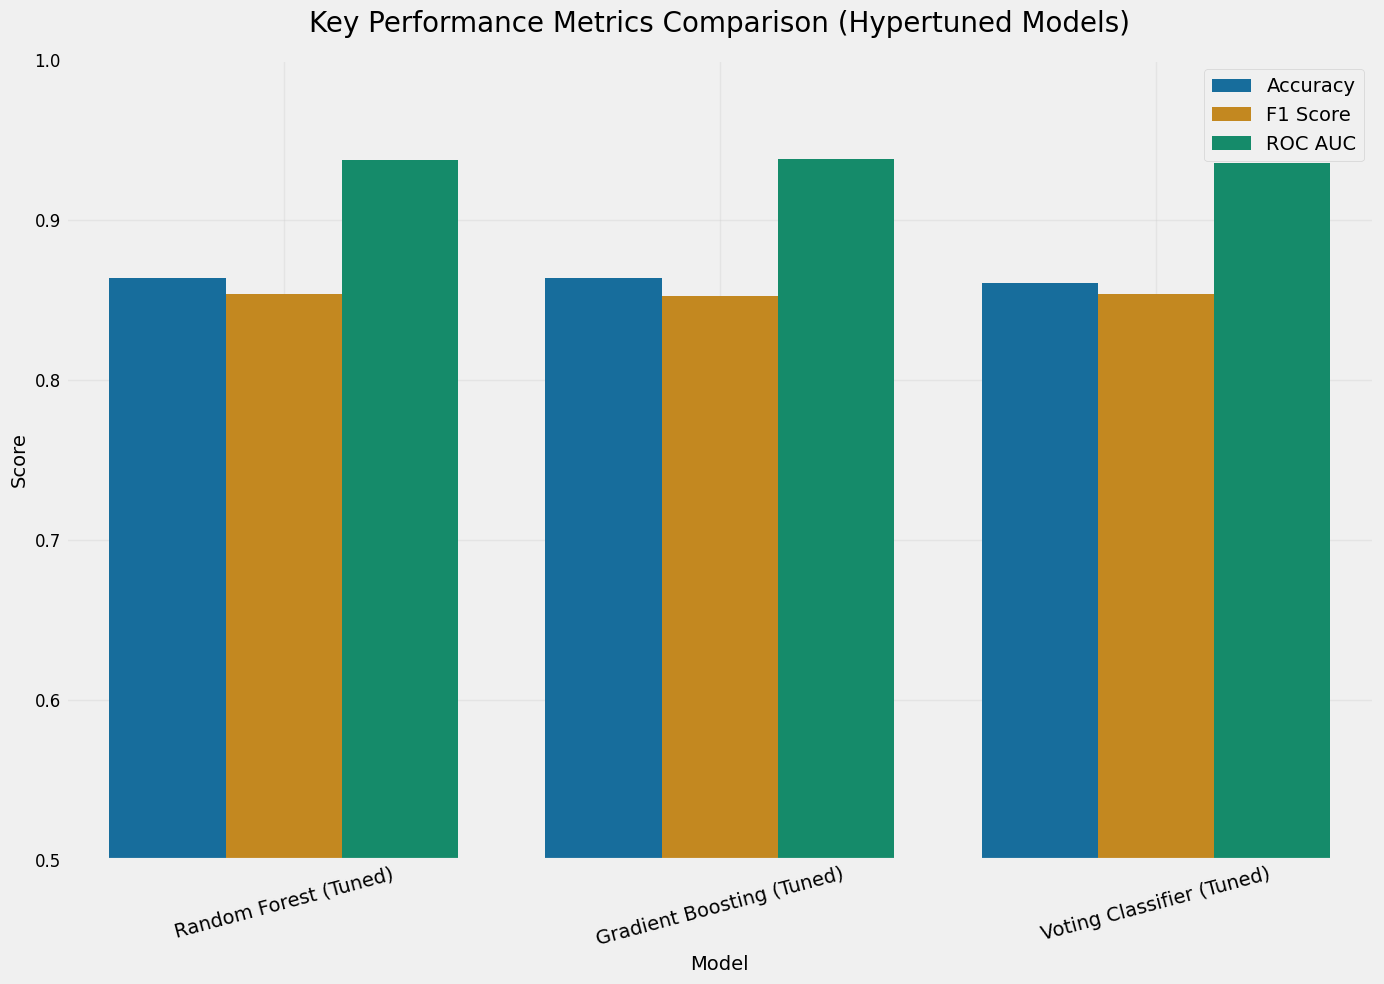

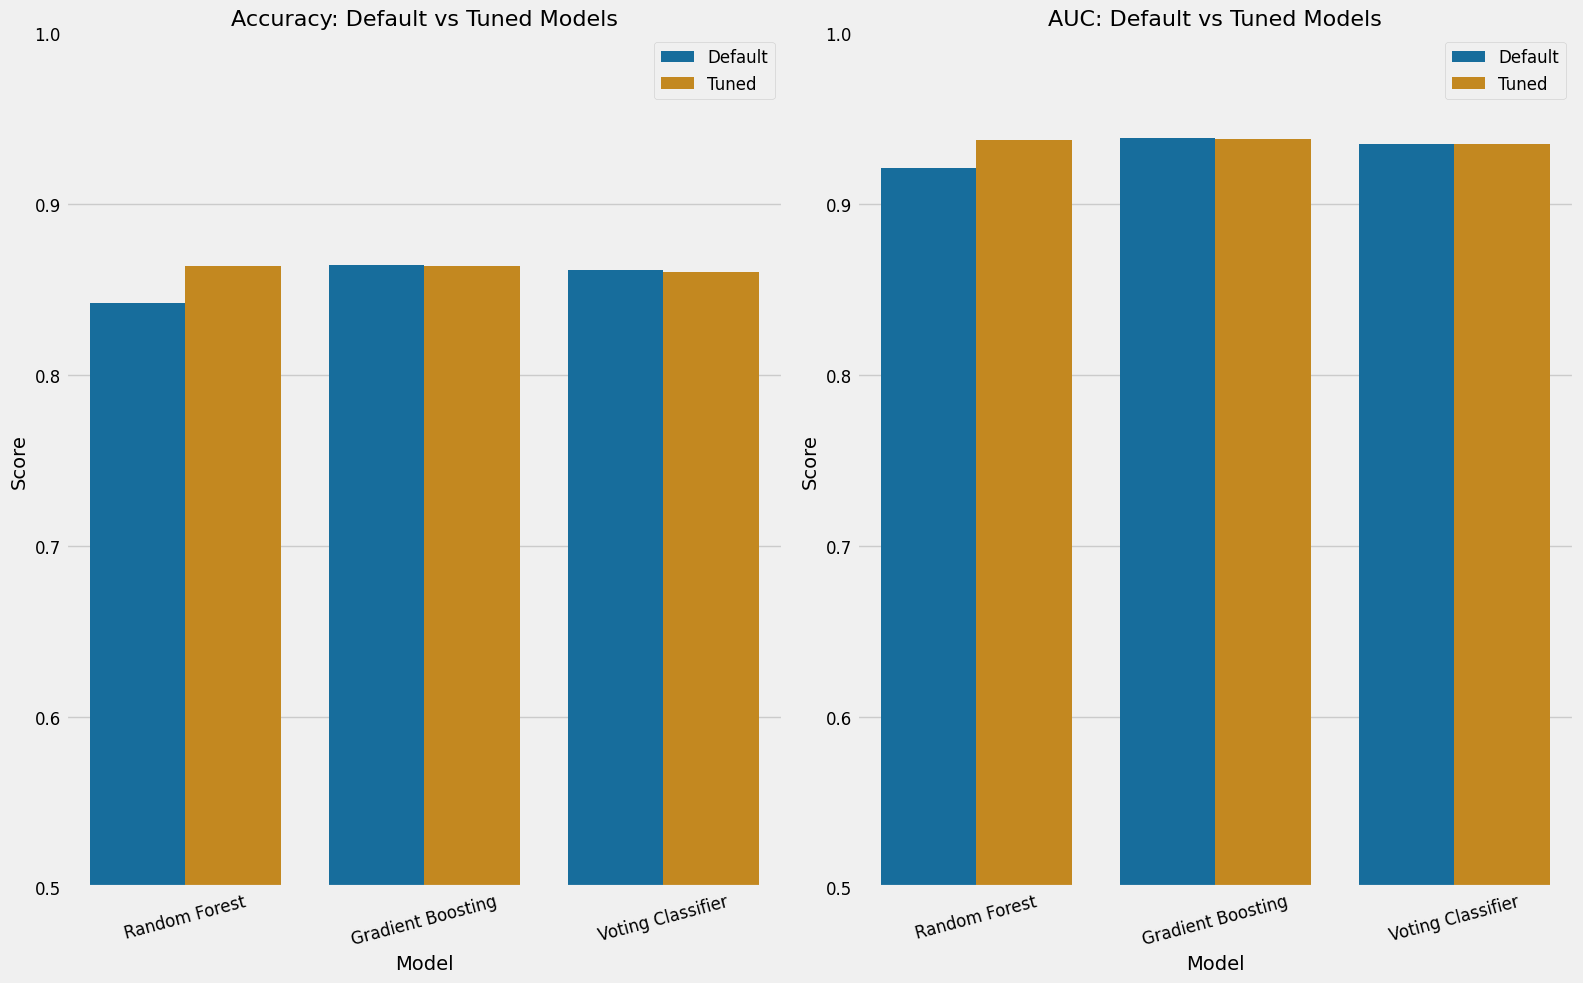

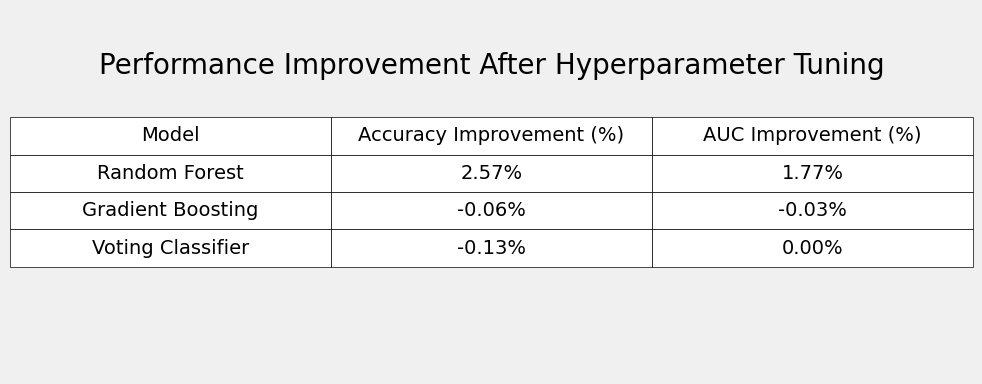

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Set style for better visualization
plt.style.use('fivethirtyeight')
sns.set_palette("colorblind")

# Increase default font size for better readability in screenshots
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Models to compare - hypertuned versions
models = ['Random Forest (Tuned)', 'Gradient Boosting (Tuned)', 'Voting Classifier (Tuned)']
predictions = [y_pred_rf_tuning, y_pred_gb_tuned, y_pred_soft_tuned]
probabilities = [y_rf_tuning_probs, y_probs_tuned, y_voting_probs]
cv_scores = [rf_tuning_scores, gb_tuned_scores, voting_scores]

# Calculate metrics
accuracy = [accuracy_score(y_test, pred) for pred in predictions]
precision = [precision_score(y_test, pred) for pred in predictions]
recall = [recall_score(y_test, pred) for pred in predictions]
f1 = [f1_score(y_test, pred) for pred in predictions]
roc_auc_scores = [auc(roc_curve(y_test, prob)[0], roc_curve(y_test, prob)[1]) for prob in probabilities]
cv_means = [scores.mean() for scores in cv_scores]
cv_stds = [scores.std() for scores in cv_scores]

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc_scores,
    'CV Mean': cv_means,
    'CV Std': cv_stds
})

# Create individual plots with larger sizes and better spacing for screenshots

# 1. Performance Metrics Bar Chart
plt.figure(figsize=(14, 10))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
data_to_plot = pd.melt(metrics_df, id_vars=['Model'], value_vars=metrics_to_plot,
                      var_name='Metric', value_name='Score')
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=data_to_plot)
plt.title('Performance Metrics Comparison (Hypertuned Models)', fontsize=20, pad=20)
plt.ylim(0, 1)
plt.xticks(rotation=15, fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('tuned_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. ROC Curves for all models in one plot
plt.figure(figsize=(14, 10))
colors = ['darkorange', 'green', 'blue']
for i, model in enumerate(models):
    fpr, tpr, _ = roc_curve(y_test, probabilities[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=3,
             label=f'{model} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curves Comparison (Hypertuned Models)', fontsize=20, pad=20)
plt.legend(loc="lower right", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('tuned_roc_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Cross-validation scores comparison
plt.figure(figsize=(14, 10))
cv_data = pd.DataFrame({
    'Model': np.repeat(models, [len(s) for s in cv_scores]),
    'CV Score': np.concatenate(cv_scores)
})
sns.boxplot(x='Model', y='CV Score', data=cv_data)
plt.title('Cross-Validation Scores (Hypertuned Models)', fontsize=20, pad=20)
plt.xticks(rotation=15, fontsize=14)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Model', fontsize=16)
plt.ylim(0.5, 1.0)  # Adjust as needed based on your actual scores
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('tuned_cv_scores_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Feature importance comparison (for RF and GB only)
plt.figure(figsize=(14, 10))
top_n = 10  # Number of top features to show

# Make sure we have the feature importances series
if 'forest_importances' in locals() and 'gb_importances' in locals():
    # Create a combined DataFrame with all unique top features
    feature_compare = pd.DataFrame({
        'Random Forest': forest_importances,
        'Gradient Boosting': gb_importances
    })

    # Sort features by combined importance
    feature_compare['Mean'] = feature_compare.mean(axis=1)
    feature_compare = feature_compare.sort_values('Mean', ascending=False).head(top_n)
    del feature_compare['Mean']  # Remove the helper column

    # Plot the feature importances
    ax = feature_compare.plot(kind='barh', figsize=(14, 10))
    plt.title('Top Feature Importances (Hypertuned Models)', fontsize=20, pad=20)
    plt.xlabel('Importance', fontsize=16)
    plt.ylabel('Features', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.savefig('tuned_feature_importance_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# 5. Summary table of all metrics
plt.figure(figsize=(16, 6))
# Format the numbers to be more readable
metrics_df_display = metrics_df.copy()
for col in metrics_df_display.columns:
    if col != 'Model' and metrics_df_display[col].dtype != 'object':
        metrics_df_display[col] = metrics_df_display[col].map('{:.3f}'.format)

# Create a table with the metrics
plt.axis('off')
tbl = plt.table(cellText=metrics_df_display.values, colLabels=metrics_df_display.columns,
                loc='center', cellLoc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(1.5, 2.0)
plt.title('Model Performance Summary (Hypertuned Models)', fontsize=20, y=0.8)
plt.tight_layout()
plt.savefig('tuned_metrics_table.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Combined visualization of accuracy, F1, and ROC AUC in one chart
plt.figure(figsize=(14, 10))
combined_metrics = ['Accuracy', 'F1 Score', 'ROC AUC']
combined_data = pd.melt(metrics_df, id_vars=['Model'], value_vars=combined_metrics,
                        var_name='Metric', value_name='Score')

# Create a grouped bar chart
sns.barplot(x='Model', y='Score', hue='Metric', data=combined_data)
plt.title('Key Performance Metrics Comparison (Hypertuned Models)', fontsize=20, pad=20)
plt.ylim(0.5, 1)  # Set a reasonable y-limit to better show differences
plt.xticks(rotation=15, fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('tuned_combined_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Comparison of default vs tuned models (if previous metrics are available)
try:
    # Try to access default model metrics from previous execution
    default_models = ['Random Forest', 'Gradient Boosting', 'Voting Classifier']
    default_predictions = [y_pred_rf, y_pred_gb, y_pred_soft]
    default_probabilities = [y_rf_probs, y_probs, y_voting_probs]

    # Get accuracy and AUC for both default and tuned models
    default_accuracy = [accuracy_score(y_test, pred) for pred in default_predictions]
    default_auc = [auc(roc_curve(y_test, prob)[0], roc_curve(y_test, prob)[1]) for prob in default_probabilities]

    # Create comparison dataframe
    comparison_data = pd.DataFrame({
        'Model': ['Random Forest', 'Gradient Boosting', 'Voting Classifier'],
        'Default Accuracy': default_accuracy,
        'Tuned Accuracy': accuracy[:3],  # First 3 correspond to the tuned versions
        'Default AUC': default_auc,
        'Tuned AUC': roc_auc_scores[:3]  # First 3 correspond to the tuned versions
    })

    # Plot comparison of default vs tuned models
    plt.figure(figsize=(16, 10))

    # Prepare data for plotting
    comparison_long = pd.melt(comparison_data,
                               id_vars=['Model'],
                               value_vars=['Default Accuracy', 'Tuned Accuracy',
                                          'Default AUC', 'Tuned AUC'],
                               var_name='Metric',
                               value_name='Score')

    # Add metric type column for grouping
    comparison_long['Metric Type'] = comparison_long['Metric'].apply(
        lambda x: 'Accuracy' if 'Accuracy' in x else 'AUC')
    comparison_long['Version'] = comparison_long['Metric'].apply(
        lambda x: 'Default' if 'Default' in x else 'Tuned')

    # Plot for Accuracy
    plt.subplot(1, 2, 1)
    accuracy_data = comparison_long[comparison_long['Metric Type'] == 'Accuracy']
    sns.barplot(x='Model', y='Score', hue='Version', data=accuracy_data)
    plt.title('Accuracy: Default vs Tuned Models', fontsize=16)
    plt.ylim(0.5, 1.0)
    plt.xticks(rotation=15)
    plt.legend()

    # Plot for AUC
    plt.subplot(1, 2, 2)
    auc_data = comparison_long[comparison_long['Metric Type'] == 'AUC']
    sns.barplot(x='Model', y='Score', hue='Version', data=auc_data)
    plt.title('AUC: Default vs Tuned Models', fontsize=16)
    plt.ylim(0.5, 1.0)
    plt.xticks(rotation=15)
    plt.legend()

    plt.tight_layout()
    plt.savefig('default_vs_tuned_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Show improvement percentages
    improvement_df = pd.DataFrame({
        'Model': comparison_data['Model'],
        'Accuracy Improvement (%)': (comparison_data['Tuned Accuracy'] - comparison_data['Default Accuracy']) / comparison_data['Default Accuracy'] * 100,
        'AUC Improvement (%)': (comparison_data['Tuned AUC'] - comparison_data['Default AUC']) / comparison_data['Default AUC'] * 100
    })

    # Display improvement table
    plt.figure(figsize=(12, 4))
    plt.axis('off')
    improvement_display = improvement_df.copy()
    for col in improvement_display.columns:
        if col != 'Model' and improvement_display[col].dtype != 'object':
            improvement_display[col] = improvement_display[col].map('{:.2f}%'.format)

    tbl = plt.table(cellText=improvement_display.values, colLabels=improvement_display.columns,
                    loc='center', cellLoc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(14)
    tbl.scale(1.5, 2.0)
    plt.title('Performance Improvement After Hyperparameter Tuning', fontsize=20, y=0.8)
    plt.tight_layout()
    plt.savefig('tuning_improvement_table.png', dpi=300, bbox_inches='tight')
    plt.show()
except (NameError, ValueError) as e:
    print("Couldn't create comparison with default models. Make sure default model results are available.")
    print(f"Error: {e}")

# Model Interpretation

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(rf_tuning)
shap_values = explainer(X)

In [ ]:
np.shape(shap_values.values)

(9000, 4, 2)

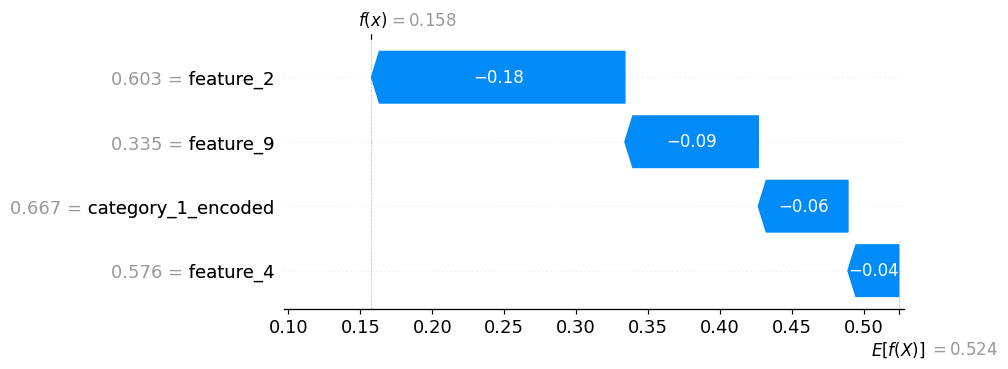

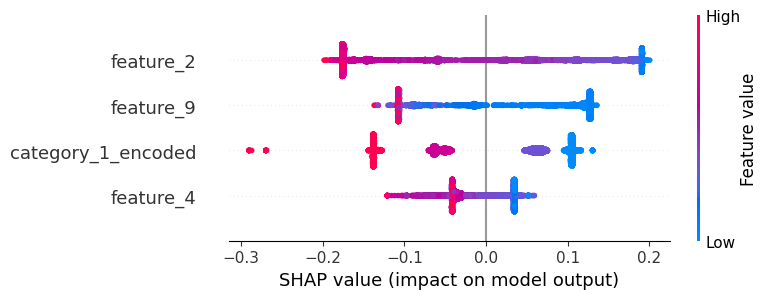

In [ ]:
shap.plots.waterfall(shap_values[0, :, 0])
shap.summary_plot(shap_values[:, :, 0])

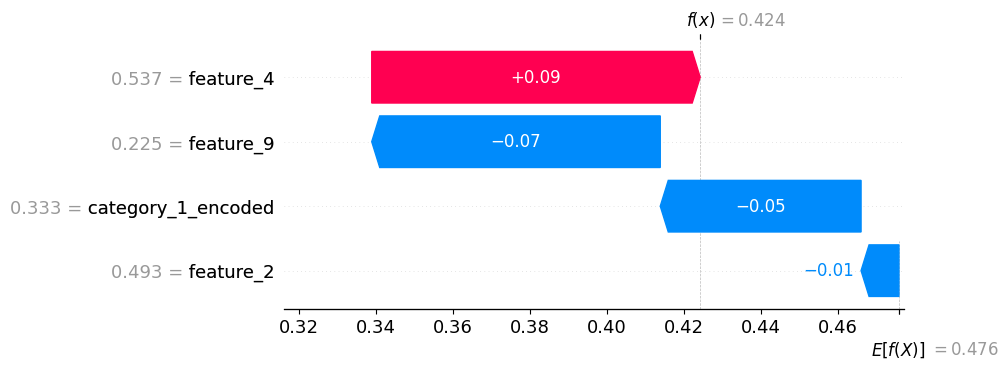

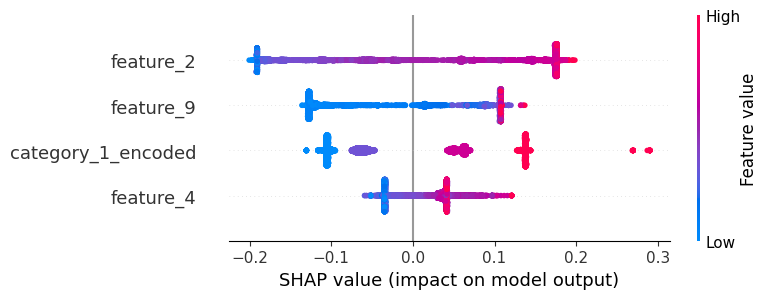

In [ ]:
shap.plots.waterfall(shap_values[1, :, 1])
shap.summary_plot(shap_values[:, :, 1])

In [ ]:
explainer_gb = shap.TreeExplainer(gb_tuned)
shap_values_gb = explainer_gb(X)

In [ ]:
shap_values_train = explainer.shap_values(X_train)
shap_values_test = explainer.shap_values(X_test)

In [ ]:
np.shape(shap_values_gb.values)

(9000, 4)

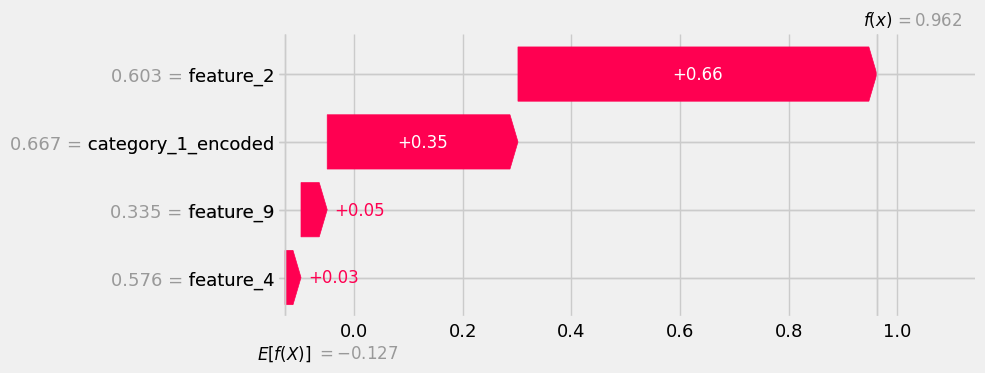

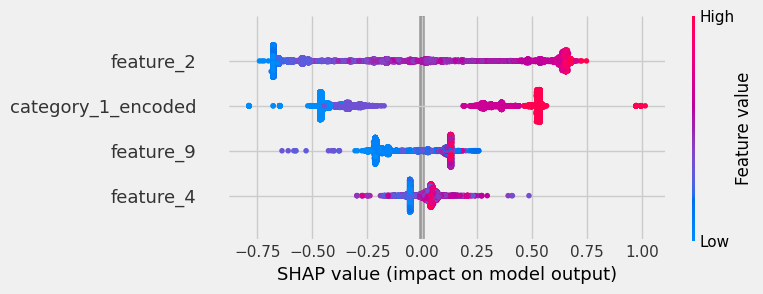

In [ ]:
shap.plots.waterfall(shap_values_gb[0, :])
shap.summary_plot(shap_values_gb)

In [ ]:
!pip install lime

In [ ]:
import lime
import lime.lime_tabular
import numpy as np

# Step 1: Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,                 # training data as numpy array
    feature_names=X_train.columns.tolist(),       # column names
    class_names=['Class 0', 'Class 1'],           # adjust if needed
    mode='classification'
)

# Step 2: Choose a test sample to explain
i = 5
sample = X_test.iloc[i]
sample_df = pd.DataFrame([sample], columns=X_test.columns)  # Important fix here

# Step 3: Generate the explanation
exp = explainer.explain_instance(
    data_row=sample.values,                        # Now safe: still array, but from Series
    predict_fn=lambda x: soft_voting_tuned.predict_proba(pd.DataFrame(x, columns=X_test.columns)),
    num_features=10
)

# Step 4: Visualize the explanation
exp.show_in_notebook(show_table=True)

# Optional: print explanation in terminal
print(f"\nExplanation for Test Sample #{i}:\n", exp.as_list())


Explanation for Test Sample #5:
 [('0.38 < feature_2 <= 0.50', -0.050373150820267), ('0.38 < feature_4 <= 0.50', -0.03878285932043989), ('0.00 < category_1_encoded <= 0.67', -0.029948582573346365), ('feature_9 <= 0.23', -0.002457921378577522)]


In [ ]:
df_4 = df_3.copy()
print("Column names in df_3:")
print(df_3.columns.tolist())

Column names in df_3:
['feature_2', 'feature_4', 'target', 'category_1_encoded', 'feature_9']


In [ ]:

new_column_names = {
    'feature_2': 'Course Engagement Score (0-10)',
    'feature_4': 'Average Time Spent Per Session (minutes)',
    'target': 'Dropout Status',
    'category_1_encoded': 'Student Type',
    'feature_9': 'Number of Missed Deadlines'
}

# Rename the columns
df_4 = df_4.rename(columns=new_column_names)

print("DataFrame columns after renaming:")
print(df_4.columns)
print("\nFirst few rows with new column names:")
print(df_4.head())

DataFrame columns after renaming:
Index(['Course Engagement Score (0-10)',
       'Average Time Spent Per Session (minutes)', 'Dropout Status',
       'Student Type', 'Number of Missed Deadlines'],
      dtype='object')

First few rows with new column names:
   Course Engagement Score (0-10)  Average Time Spent Per Session (minutes)  \
0                        0.602870                                  0.575676   
1                        0.493050                                  0.537082   
2                        0.625464                                  0.654372   
3                        0.740199                                  0.738960   
4                        0.453284                                  0.461068   

   Dropout Status  Student Type  Number of Missed Deadlines  
0             1.0      0.666667                    0.335249  
1             0.0      0.333333                    0.225439  
2             1.0      1.000000                    0.423491  
3             1.0 

In [ ]:
df_4.head()

Course Engagement Score (0-10)  Average Time Spent Per Session (minutes)  \
0                        0.602870                                  0.575676   
1                        0.493050                                  0.537082   
2                        0.625464                                  0.654372   
3                        0.740199                                  0.738960   
4                        0.453284                                  0.461068   

   Dropout Status  Student Type  Number of Missed Deadlines  
0             1.0      0.666667                    0.335249  
1             0.0      0.333333                    0.225439  
2             1.0      1.000000                    0.423491  
3             1.0      1.000000                    0.600099  
4             0.0      0.333333                    0.205036

<ipython-input-228-65bddcd6bff0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Impact_Magnitude', y='Feature', data=df_chart, palette='viridis') # You can choose a different color palette


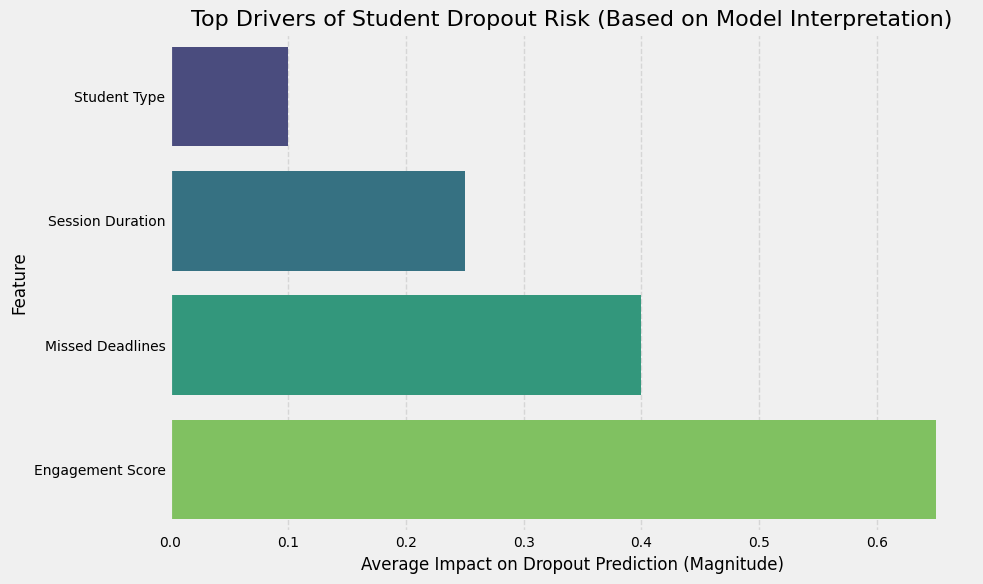

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
feature_names_display = [
    "Engagement Score",
    "Missed Deadlines",
    "Session Duration",
    "Student Type"
]

impact_magnitudes = [0.65, 0.40, 0.25, 0.10]
import pandas as pd
df_chart = pd.DataFrame({
    'Feature': feature_names_display,
    'Impact_Magnitude': impact_magnitudes
})

df_chart = df_chart.sort_values(by='Impact_Magnitude', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Impact_Magnitude', y='Feature', data=df_chart, palette='viridis') # You can choose a different color palette

plt.title('Top Drivers of Student Dropout Risk (Based on Model Interpretation)', fontsize=16)
plt.xlabel('Average Impact on Dropout Prediction (Magnitude)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()